<div class="alert alert-block alert-info">   

# Forecasting Energy usage (KwH) at YVR Airport  
#### Tanmay Jain 

</div>

[Cheat sheet for Markdown in Jupyter for reference](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)

---

## Table of Contents
[Project description](#Description)  
[Part A: Time plot, trying transformations/adjustments, creating training and test set](#PartA)  
[Part B](#PartB)  
[Introduction & Approach](#Introduction)  
[Exploratory Data Analysis](#EDA1)  
[Potential causes of patterns](#Causes)   
[Exponential Smoothing Model](#ETS)  
[ARIMA model](#ARIMA)  
[Comparison of models](#Compare)  
[Forecasts](#Forecast)  
[Discussion](#Discussion)  
[Explanatory model](#Explanatory)


[Appendix A: ETS Models](#AppendixA)  
[Appendix B: ARIMA Models](#AppendixB)

---

<div class="alert alert-block alert-info">   
<a id="Description"></a>

# Project description

**Objective**  

The main goal of this project is to develop a model to forecast monthly energy use for the Vancouver International Airport (YVR).  

<br>

**Introduction**  

Budget planning at YVR requires forecasting the cost of energy to operate the airport. An accurate forecast could help the YVR representatives negotiate more favourable contracts with energy suppliers.

<br>

**Data Available**  

Data was taken from 14 years of records from the YVR database. This data set includes information on date, energy use, temperature, terminal area, and number of passengers. Data have been aggregated by month into 168 records (14 years with 12 months each).  

<br>


| # | Variable | Definition |  
| :- | :- | :- |  
| 1 | month | Month and year, e.g.: Nov-98 |
| 2 | energy | Energy use measured in thousands of kilowatt hours (kWh) |
| 3 | mean.temp | Mean monthly temperature outside (degrees Celsius) |
| 4 | total.area | Total area of all terminals (sq. m.) |
| 5 | total.passengers | Total number of passengers in thousands |
| 6 | domestic.passengers | Total number of domestic passengers (traveling within Canada) in thousands |
| 7 | US.passengers | Total number of passengers traveling between Canada and the US in thousands |
| 8 | international.passengers | Total number of passengers traveling between YVR and countries other than Canada/US |


In this project, we will develop appropriate models, compare the models, and discuss advantages and limitations of each model. We'll select the best model and use it to provide monthly forecasts for energy use for the next three years (January 2011 through December 2013).   
    </div>

---

<div class="alert alert-block alert-info">   

# Part A 
### Time plot, trying transformations/adjustments, creating training and test set
<a id="PartA"></a>  

</div>


### Import the data

In [1]:
data <- read.csv(file="Energy use at YVR.csv")
head(data)

,month,energy,mean.temp,total.area,total.passengers,domestic.passengers,US.passengers,international.passengers
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Jan-97,5958,3.9,202966,1068.36,573.84,263.13,231.38
2,Feb-97,5859,5.0,202966,1040.30,570.36,267.39,202.56
3,Mar-97,5230,6.3,202966,1195.47,632.68,319.09,243.71
4,Apr-97,5654,9.1,202966,1086.42,599.11,265.37,221.94
5,May-97,5618,14.0,202966,1244.52,673.70,307.55,263.27
6,Jun-97,5963,15.6,202966,1352.89,729.84,333.89,289.16



### Time plot

In [3]:
library(ggplot2)
library(fpp2)
library(lubridate)
library(tsbox)

In [5]:
summary(data)
str(data)

    month               energy       mean.temp       total.area    
 Length:168         Min.   :4970   Min.   : 0.90   Min.   :202966  
 Class :character   1st Qu.:5958   1st Qu.: 5.85   1st Qu.:248046  
 Mode  :character   Median :6400   Median : 9.70   Median :248046  
                    Mean   :6538   Mean   :10.58   Mean   :257973  
                    3rd Qu.:7012   3rd Qu.:15.30   3rd Qu.:279940  
                    Max.   :8813   Max.   :19.70   Max.   :319585  
 total.passengers domestic.passengers US.passengers   international.passengers
 Min.   : 920.2   Min.   :507.1       Min.   :212.4   Min.   :189.0           
 1st Qu.:1172.1   1st Qu.:616.7       1st Qu.:292.0   1st Qu.:260.3           
 Median :1306.5   Median :692.5       Median :320.5   Median :300.1           
 Mean   :1333.1   Mean   :690.9       Mean   :337.6   Mean   :304.7           
 3rd Qu.:1439.1   3rd Qu.:747.2       3rd Qu.:366.7   3rd Qu.:348.0           
 Max.   :1892.9   Max.   :971.1       Max.   :514.

'data.frame':	168 obs. of  8 variables:
 $ month                   : chr  "Jan-97" "Feb-97" "Mar-97" "Apr-97" ...
 $ energy                  : int  5958 5859 5230 5654 5618 5963 5920 6430 6053 5514 ...
 $ mean.temp               : num  3.9 5 6.3 9.1 14 15.6 17.7 19 15.9 10.4 ...
 $ total.area              : int  202966 202966 202966 202966 202966 202966 202966 202966 202966 202966 ...
 $ total.passengers        : num  1068 1040 1195 1086 1245 ...
 $ domestic.passengers     : num  574 570 633 599 674 ...
 $ US.passengers           : num  263 267 319 265 308 ...
 $ international.passengers: num  231 203 244 222 263 ...


In [6]:
data$date_new <- parse_date_time(data$month, orders = c('my', 'ym'))

In [7]:
head(data)

In [31]:
write.csv(data, "C:\\Users\\tanma\\Downloads\\MBAN specific\\BABS 502 P3 Forecasting\\final_data.csv", row.names=FALSE)

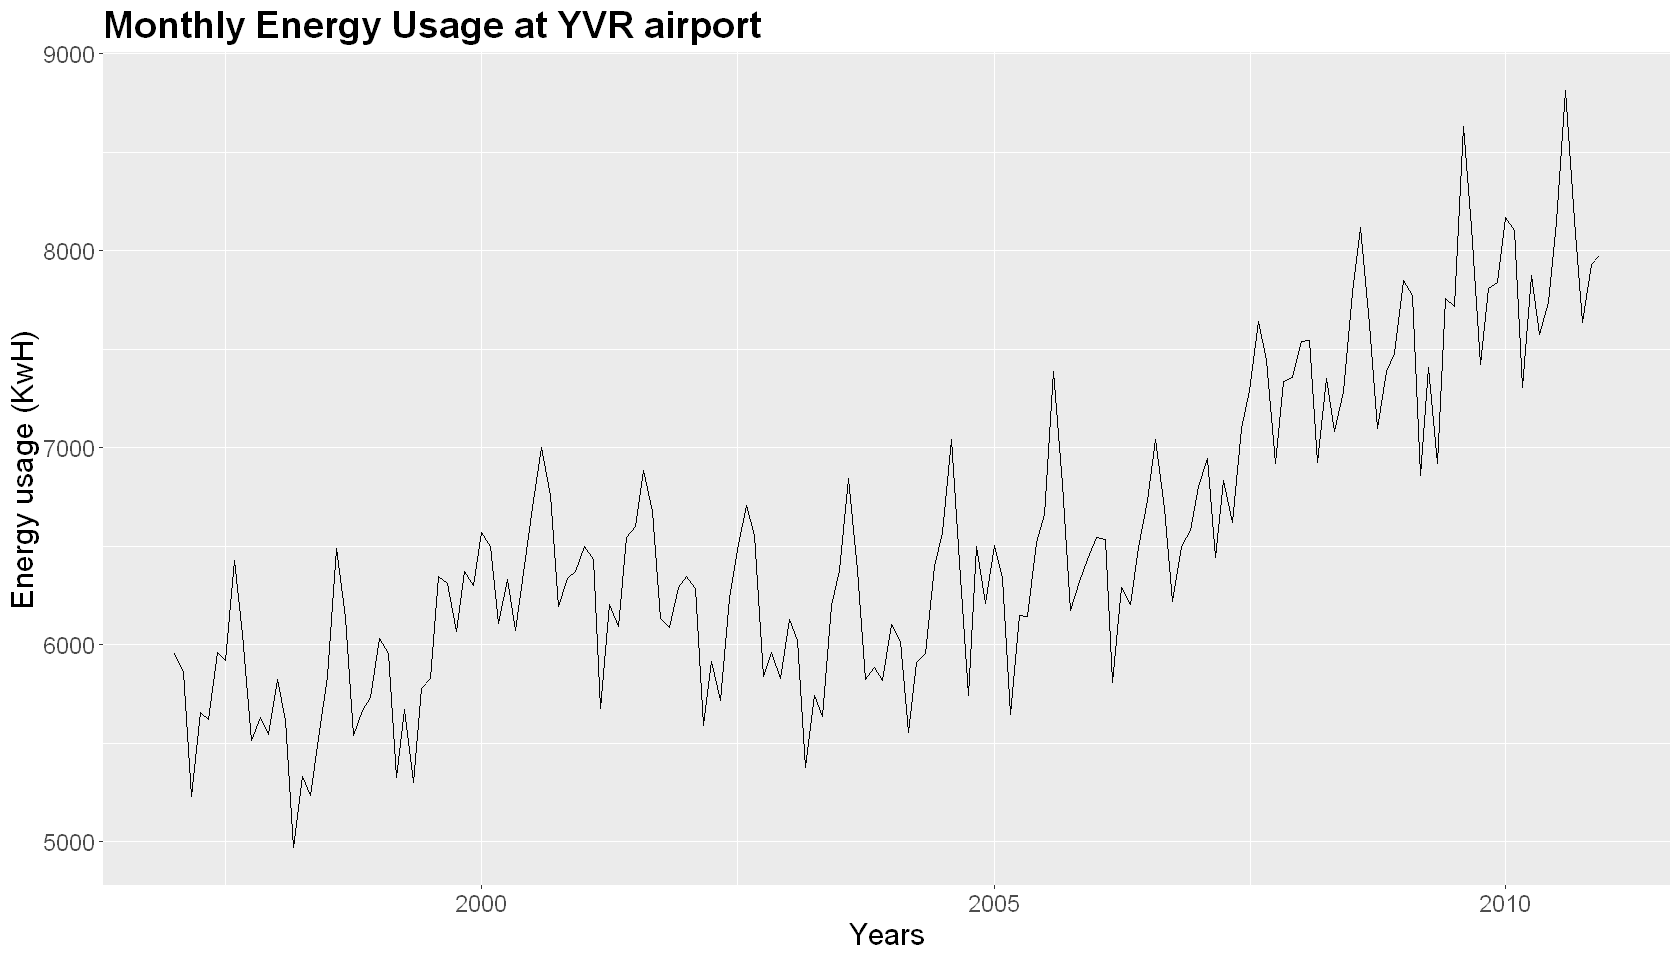

In [295]:
options(repr.plot.width=14, repr.plot.height=8)
#create time series plot
p <- ggplot(data[c("date_new", "energy")] , aes(x=date_new, y=energy)) +
       geom_line() + 
    ggtitle("Monthly Energy Usage at YVR airport") + 
    xlab('Years') + 
    ylab('Energy usage (KwH)') + 
theme(text = element_text(size = 18)) + 
theme(plot.title = element_text(size = 22, face='bold'))

#display time series plot
p

In [9]:
time.series <- data[c("date_new", "energy")]
head(time.series)

,date_new,energy
,<dttm>,<int>
1,1997-01-01,5958
2,1997-02-01,5859
3,1997-03-01,5230
4,1997-04-01,5654
5,1997-05-01,5618
6,1997-06-01,5963



### Box-Cox transformation

In [10]:
ts_data <- ts_ts(ts_long(time.series))

In [12]:
ts_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1997,5958,5859,5230,5654,5618,5963,5920,6430,6053,5514,5633,5545
1998,5825,5617,4970,5331,5233,5557,5841,6489,6138,5539,5667,5730
1999,6030,5954,5326,5672,5301,5777,5831,6345,6309,6068,6372,6302
2000,6570,6497,6106,6330,6070,6401,6697,7003,6760,6192,6334,6371
2001,6501,6435,5674,6206,6094,6544,6602,6886,6677,6133,6088,6291
2002,6349,6286,5588,5914,5716,6235,6483,6708,6553,5837,5961,5828
2003,6126,6020,5375,5741,5635,6199,6376,6844,6379,5822,5884,5820
2004,6105,6014,5552,5908,5956,6399,6572,7043,6418,5741,6497,6207
2005,6504,6337,5644,6148,6141,6521,6661,7387,6815,6173,6319,6434
2006,6544,6534,5809,6290,6202,6492,6733,7040,6690,6220,6497,6582


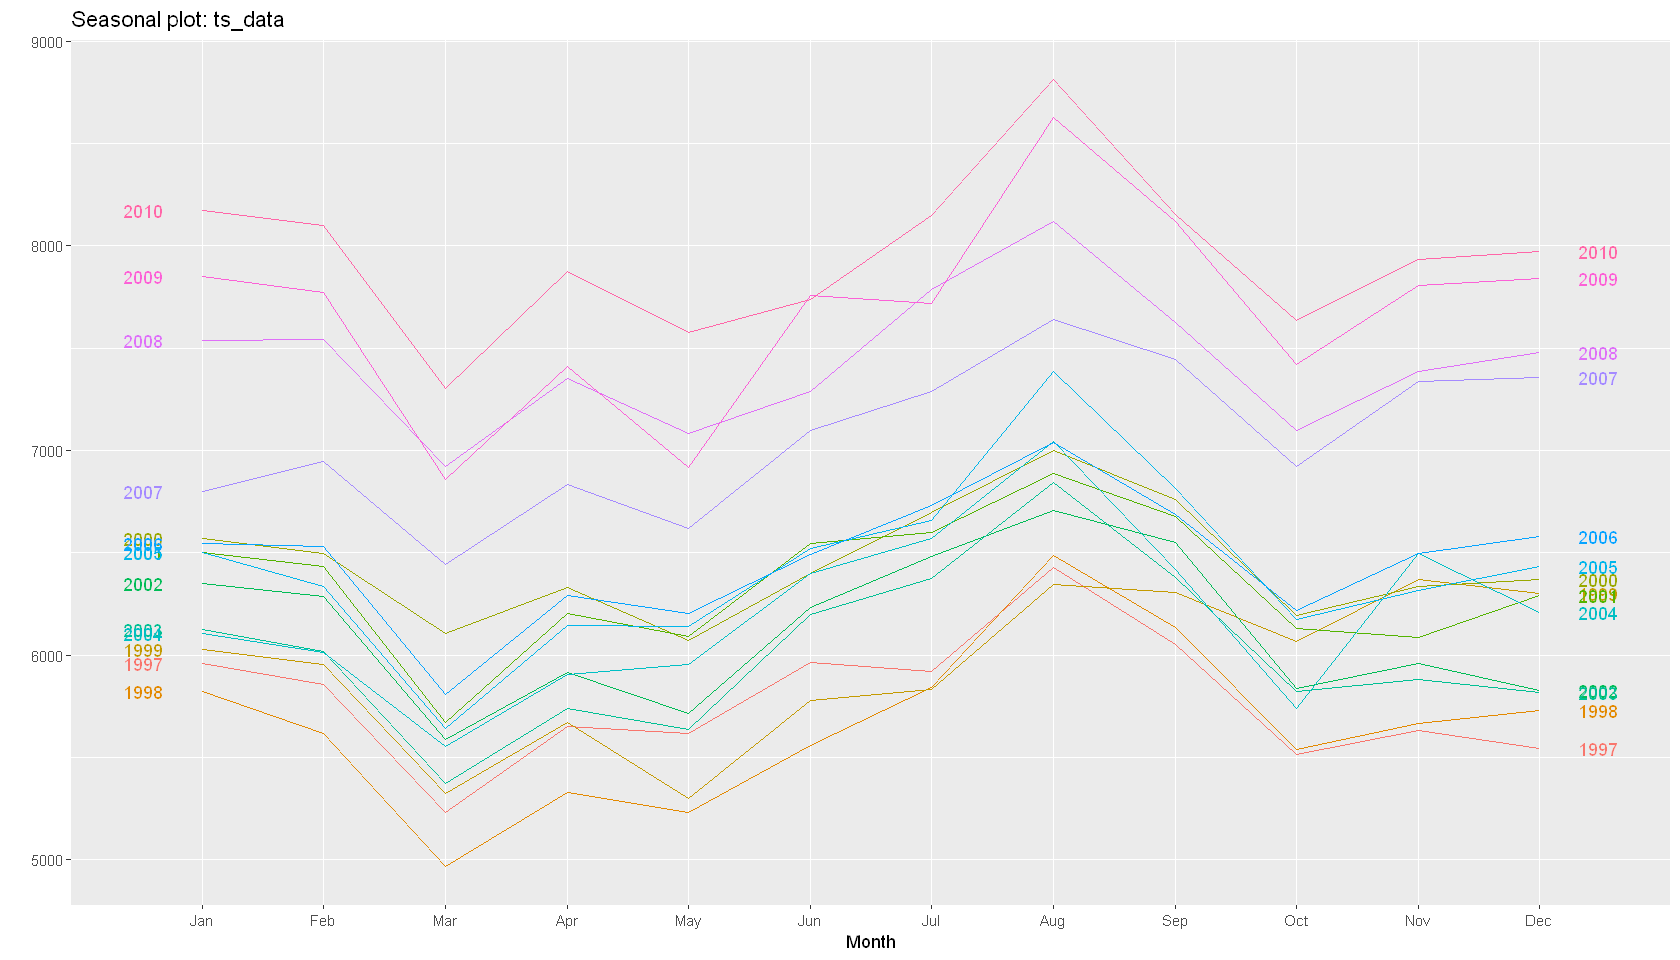

In [13]:
ggseasonplot(ts_data, year.labels=TRUE, year.labels.left=TRUE)

In [14]:
lambda <- BoxCox.lambda(ts_data) # = approximately 0.27
# here we are allowing R to select the "best" value for lambda to make variance equal
lambda

[1] 0.6931483


### Calendar adjustment for number of days in each month

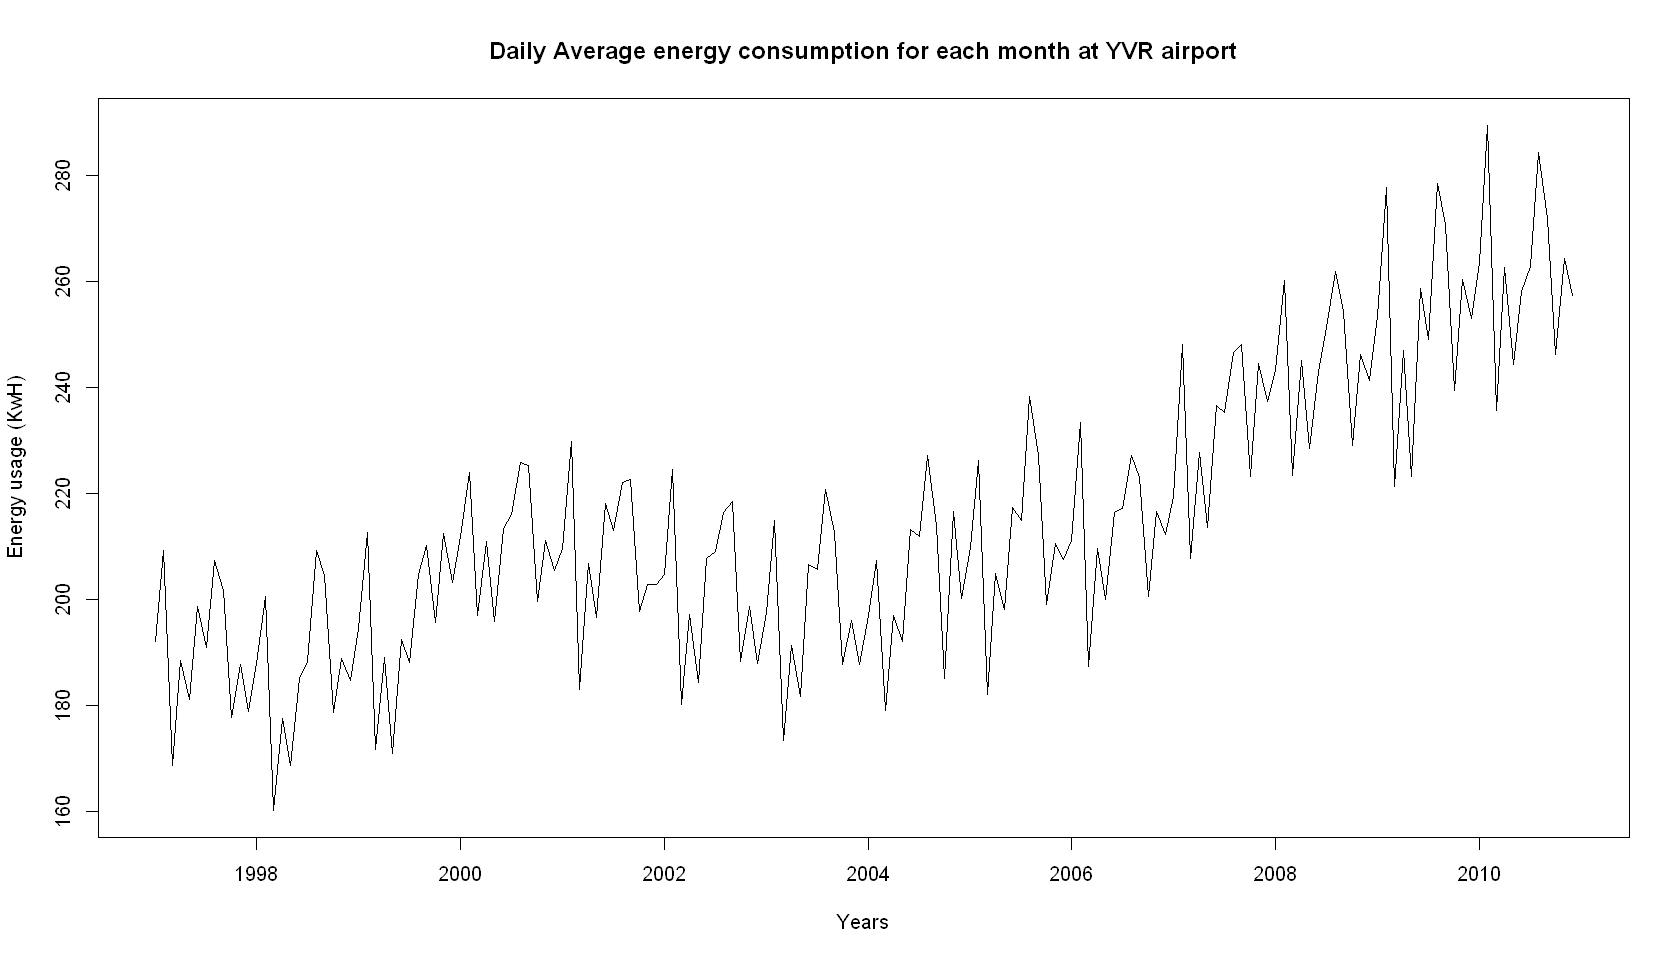

In [296]:
plot(ts_data/monthdays(ts_data), main="Daily Average energy consumption for each month at YVR airport", 
     ylab="Energy usage (KwH)", xlab="Years")

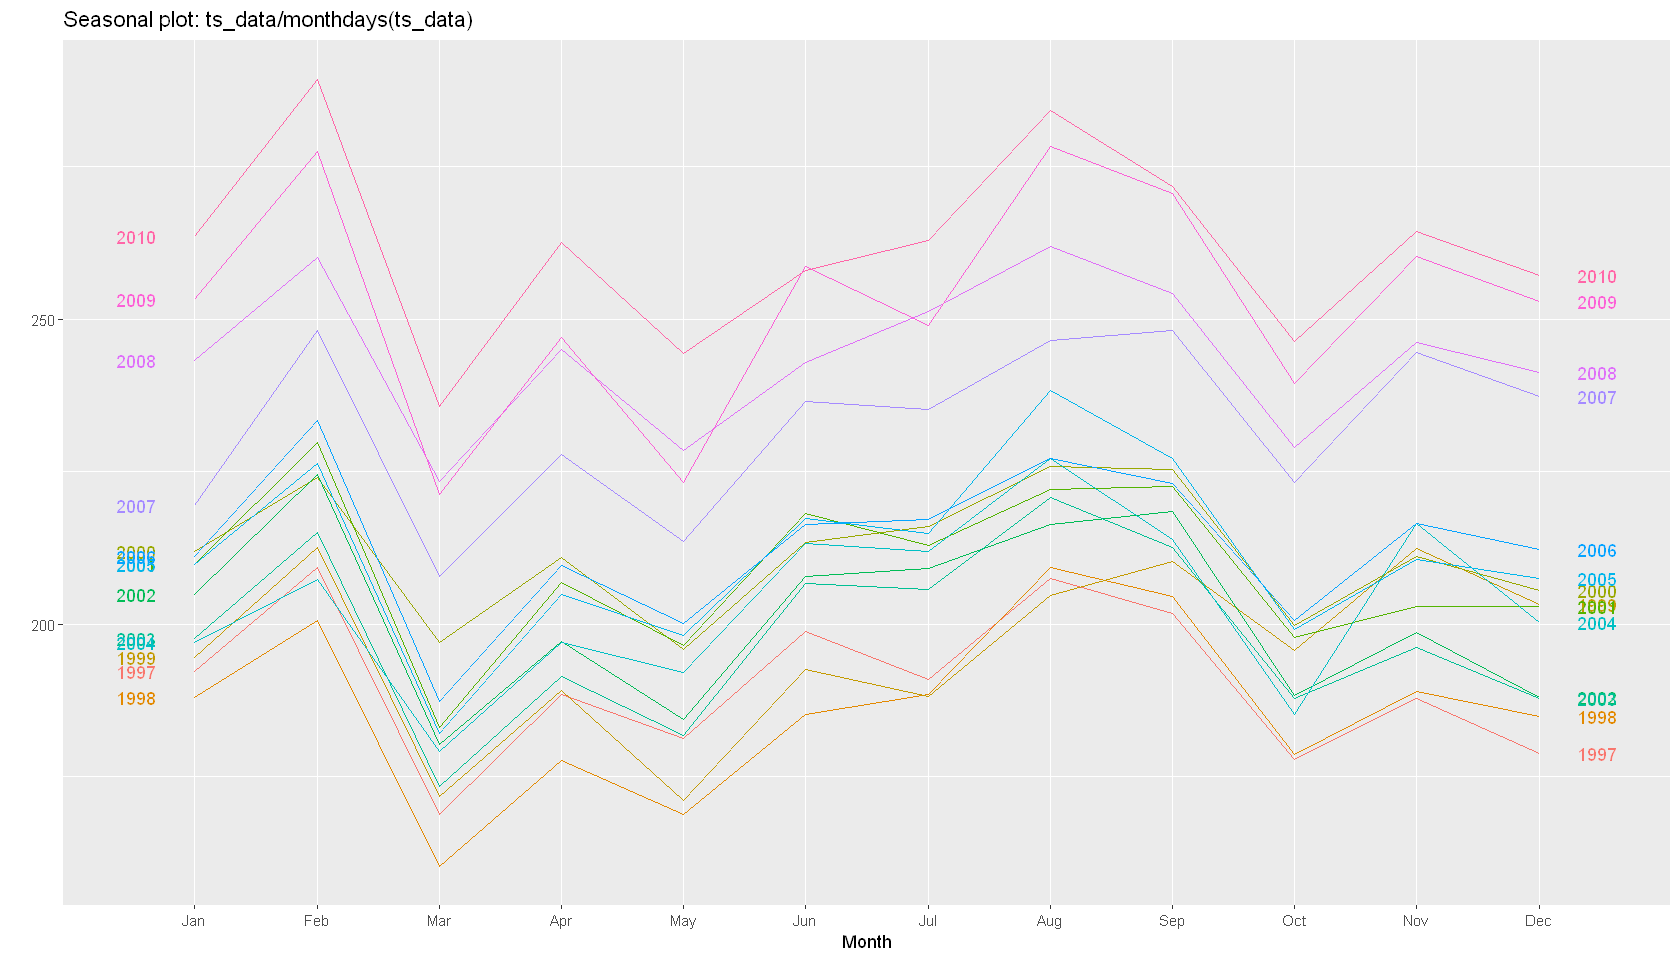

In [297]:
ggseasonplot(ts_data/monthdays(ts_data), year.labels=TRUE, year.labels.left=TRUE)

### Divide the data into the training set and the test set

In [260]:
ts_data.train <- window(ts_data,start=c(1997,1),end=c(2007, 12));
ts_data.test <- window(ts_data,start=c(2008,1));

In [261]:
ts_data.train
ts_data.test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1997,5958,5859,5230,5654,5618,5963,5920,6430,6053,5514,5633,5545
1998,5825,5617,4970,5331,5233,5557,5841,6489,6138,5539,5667,5730
1999,6030,5954,5326,5672,5301,5777,5831,6345,6309,6068,6372,6302
2000,6570,6497,6106,6330,6070,6401,6697,7003,6760,6192,6334,6371
2001,6501,6435,5674,6206,6094,6544,6602,6886,6677,6133,6088,6291
2002,6349,6286,5588,5914,5716,6235,6483,6708,6553,5837,5961,5828
2003,6126,6020,5375,5741,5635,6199,6376,6844,6379,5822,5884,5820
2004,6105,6014,5552,5908,5956,6399,6572,7043,6418,5741,6497,6207
2005,6504,6337,5644,6148,6141,6521,6661,7387,6815,6173,6319,6434
2006,6544,6534,5809,6290,6202,6492,6733,7040,6690,6220,6497,6582


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,7540,7543,6923,7351,7084,7288,7788,8120,7628,7099,7385,7481
2009,7852,7773,6859,7410,6918,7759,7718,8630,8121,7423,7809,7841
2010,8171,8101,7306,7877,7575,7740,8149,8813,8154,7635,7932,7975


----

<div class="alert alert-block alert-info">

# Part B
<a id="PartB"></a>  


</div>

<div class="alert alert-block alert-danger">
    
### Make sure that your code is organized and includes useful annotations and written descriptions of what you are seeing on plots or the conclusions that you are drawing. (0.5 marks)
  
### Prepare all plots for publication by including detailed axis labels.
    
### Complete anwers will include observations and conclusions/interpretations.
<div>

<div class="alert alert-block alert-success">

# Introduction & Approach
<a id="Introduction"></a>  

</div>

#### Objective & Background
The objective of this study is to develop a forecasting model for monthly energy consumption at the Vancouver International Airport (YVR). The data used in the study is 14 years of records from the YVR airport, including information on energy use, temperature, terminal area, number of passengers, and date.

#### Approach
The first step in this study will be exploratory data analysis using techniques such as timeplot, seasonal plot, subseries plot, and ACF plot to understand the trend-cycle, seasonality, and any unusual patterns in the data. The data will also undergo transformations as necessary. Following the exploratory data analysis, a decomposition analysis will be performed to understand the components of error, trend, and seasonality in the data.

The data will then be divided into a training set and a test set, and forecasting models will be trained and tested accordingly. These models will include basic forecasting methods such as mean, drift, naïve and seasonal naïve, as well as exponential smoothing (ETS) and autoregressive integrative (ARIMA) models. The models will be compared and evaluated based on accuracy measures such as RMSE, MAE, and MASE, and the best model will be selected.

The final step will be to use the selected model to make energy consumption forecasts for the next 3 years. The estimated energy consumption (in kilowatt-hours) can be converted to total cost by applying the expected unit cost of energy ($ per kilowatt-hour).

----

<div class="alert alert-block alert-warning">

# Exploratory Data Analysis
<a id="EDA1"></a>

</div>

Seasonality: As per the seasonal component in the decompositon ploy, we can see that the energy usage at YVR airport has uniform peaks in August and valley in March every year. Hence there is a definite seasonality of one year (12 months). 

Trend/cycle: The overall trend of the series is increasing. However, we see a small decrease at the start of the series, which is followed by an increase till 2000. After that we see a trend reveral of energy usage till 2003 after which it again starts increasing till 2010

Unusual features: As a general notion, we can assume that the number of people travelling by flights and the number of total flights increases each year, but we notice that this is not the case for years 2000-2003 which is a bit unusual according to us. The energy usage should also have increased during this period which does not happen.

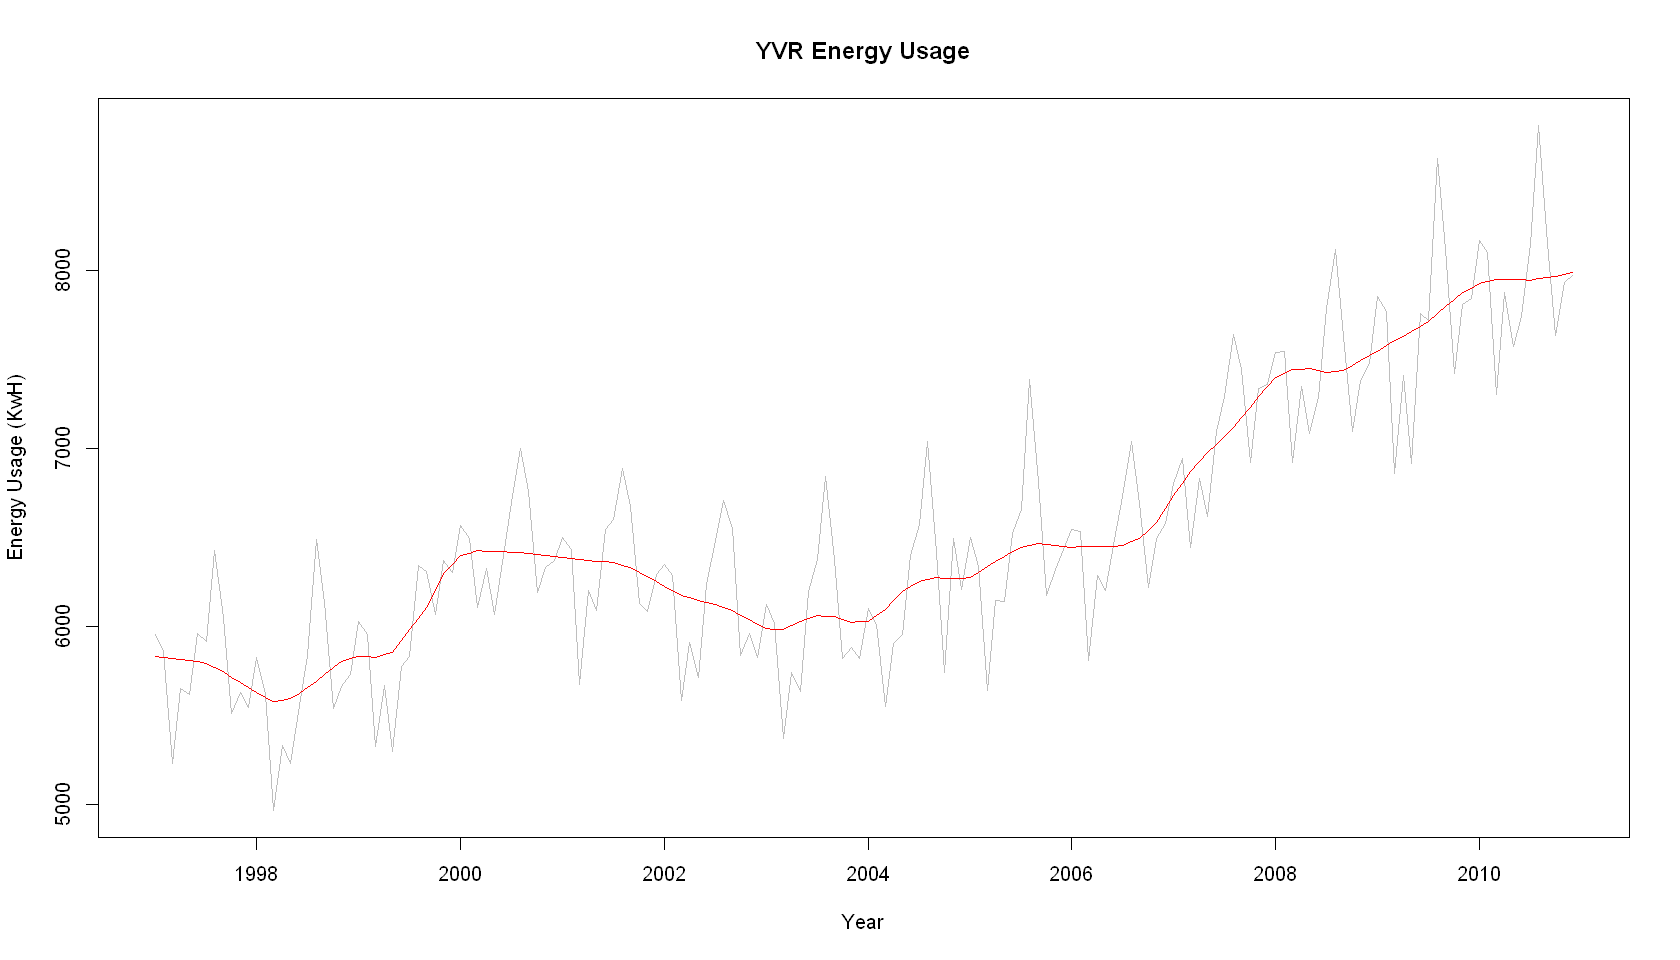

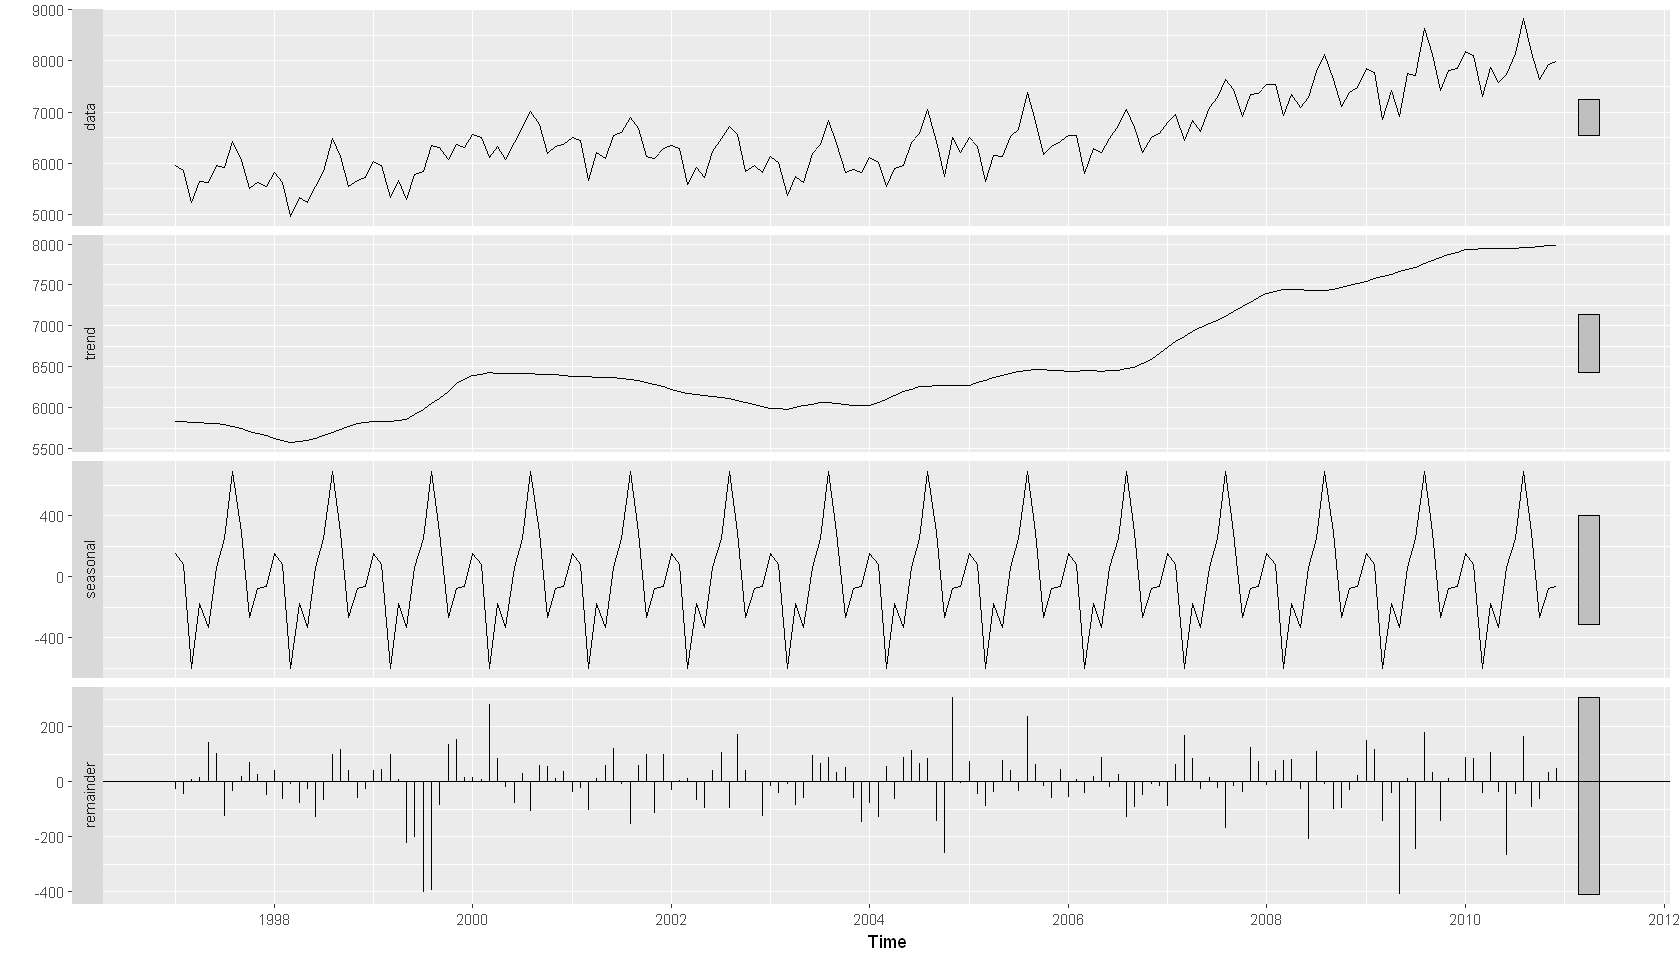

In [298]:
par(mfrow=c(1,1))
YVR.stl.fit <- stl(ts_data, t.window=13, s.window="periodic", robust=TRUE) 
plot(ts_data, col="gray", main="YVR Energy Usage", ylab="Energy Usage (KwH)", xlab="Year")
lines(YVR.stl.fit$time.series[,2],col="red",ylab="Trend") # Graph the trend-cycle
autoplot(YVR.stl.fit)

<div class="alert alert-block alert-warning">

# Potential causes
<a id="Causes"></a>
 
</div>

Patterns in electricity usage: Max in August and Min in March
this can be due to the fact that the weather is the most comfortable in August and people tend to travel more often at this time of the year. Also, most students are flying back due to schools starting in September.

The reason for energy decrease in 2000-2003 can be seen from the domestic passengers chart, as it drastically decreases between this period. This in turn will decrease the energy usage at the airport.

Another potential factor to consider is the stability of the terminal area. Over the period from 2000 to 2005, it appears that the terminal area remained unchanged, and the decrease in passenger traffic contributed to a corresponding decrease in energy consumption. However, after 2005, the terminal area increased, which in turn resulted in a rise in energy consumption.

**Please refer to the below images as they have been referred above. These have been created in Tableau and pasted here directly** 
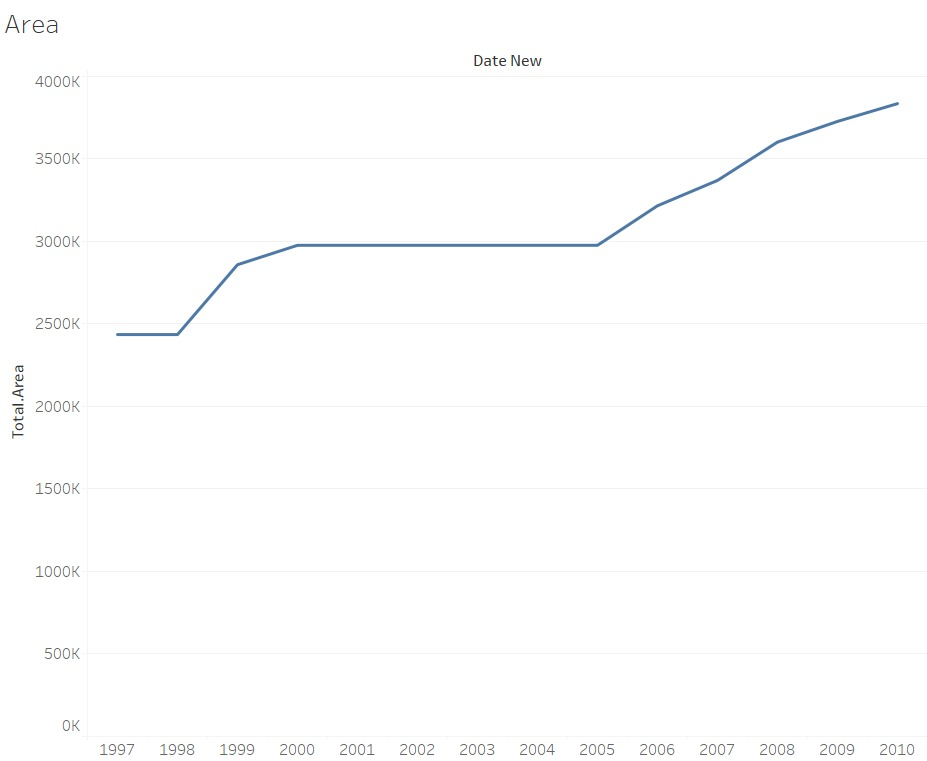
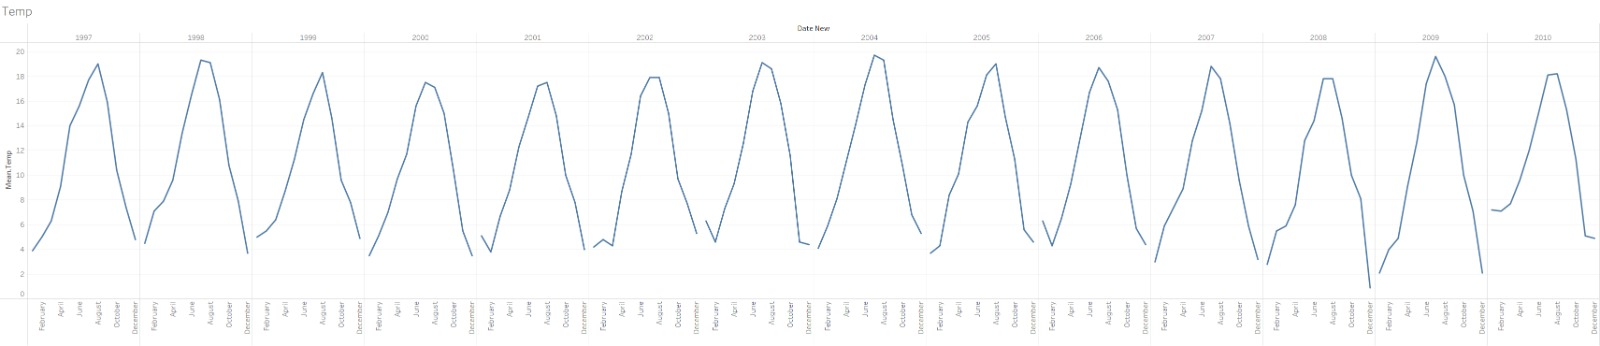
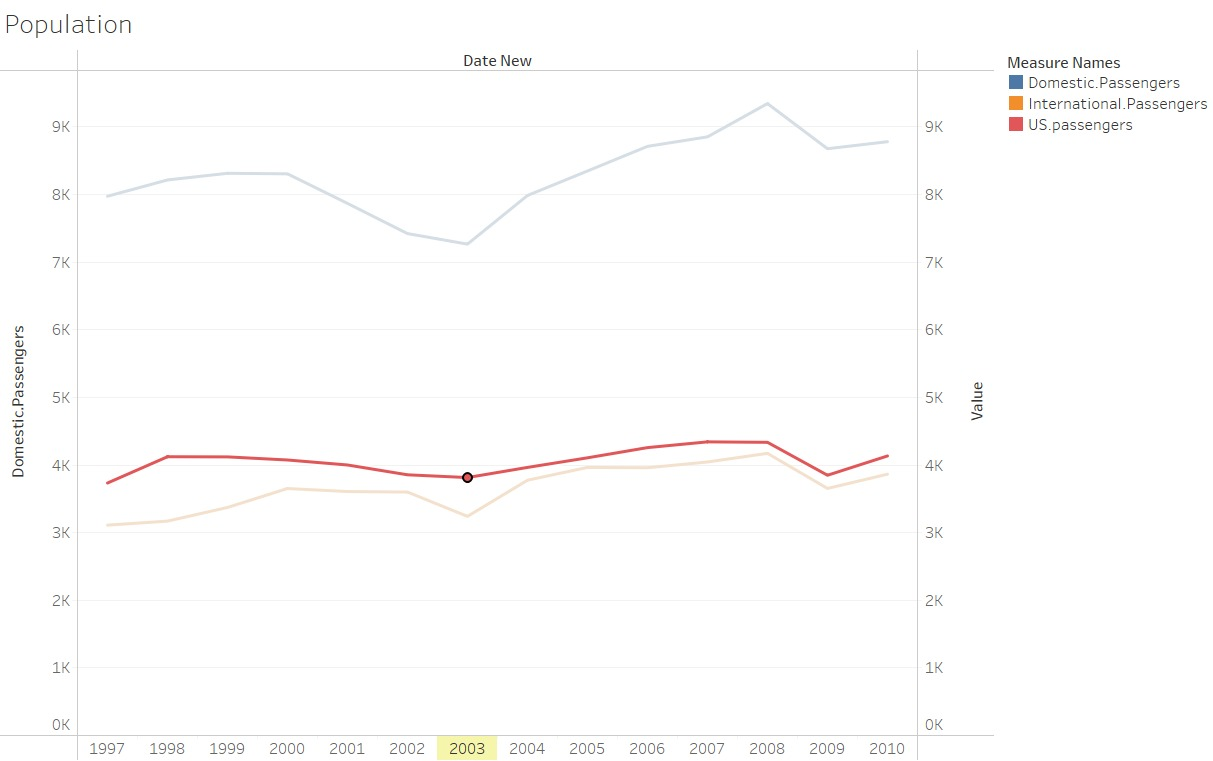

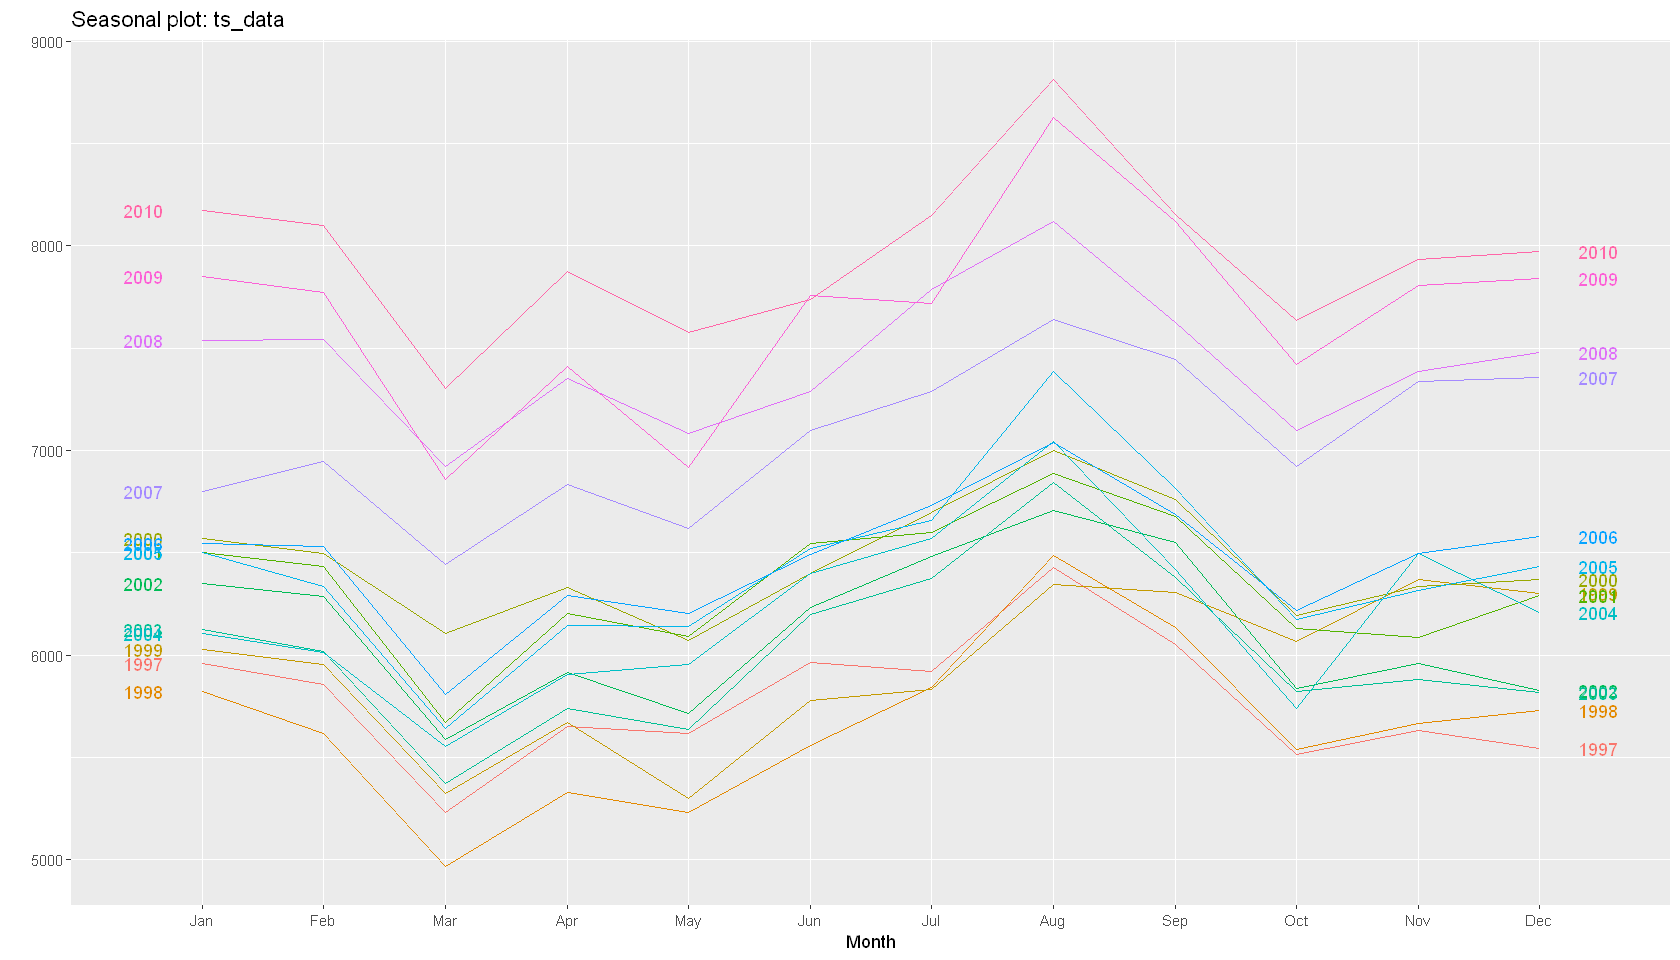

In [263]:
ggseasonplot(ts_data, year.labels=TRUE, year.labels.left=TRUE)

----

<div class="alert alert-block alert-success">

# Basic forecasting methods    
<a id="Basic"></a>

</div>  

Plotting different forecasting methods in the following colours:  

mean method (blue)  
drift method (green)  
naïve method (red)  
seasonal naïve method (purple)  

 
## Visual comparison and assessment of basic methods

From visual assessment, the drift method is able to forecast the increasing trend most accuratelyand provides the best overall forecast of the test set. Also the final value that we forecasted (after 36 months) is closest to the prediction by drift method. On the other hand, the seasonal naive method is only able to predict the annual seasonality in the data but excludes trend completely. Other methods are also worse compared to drift method. 

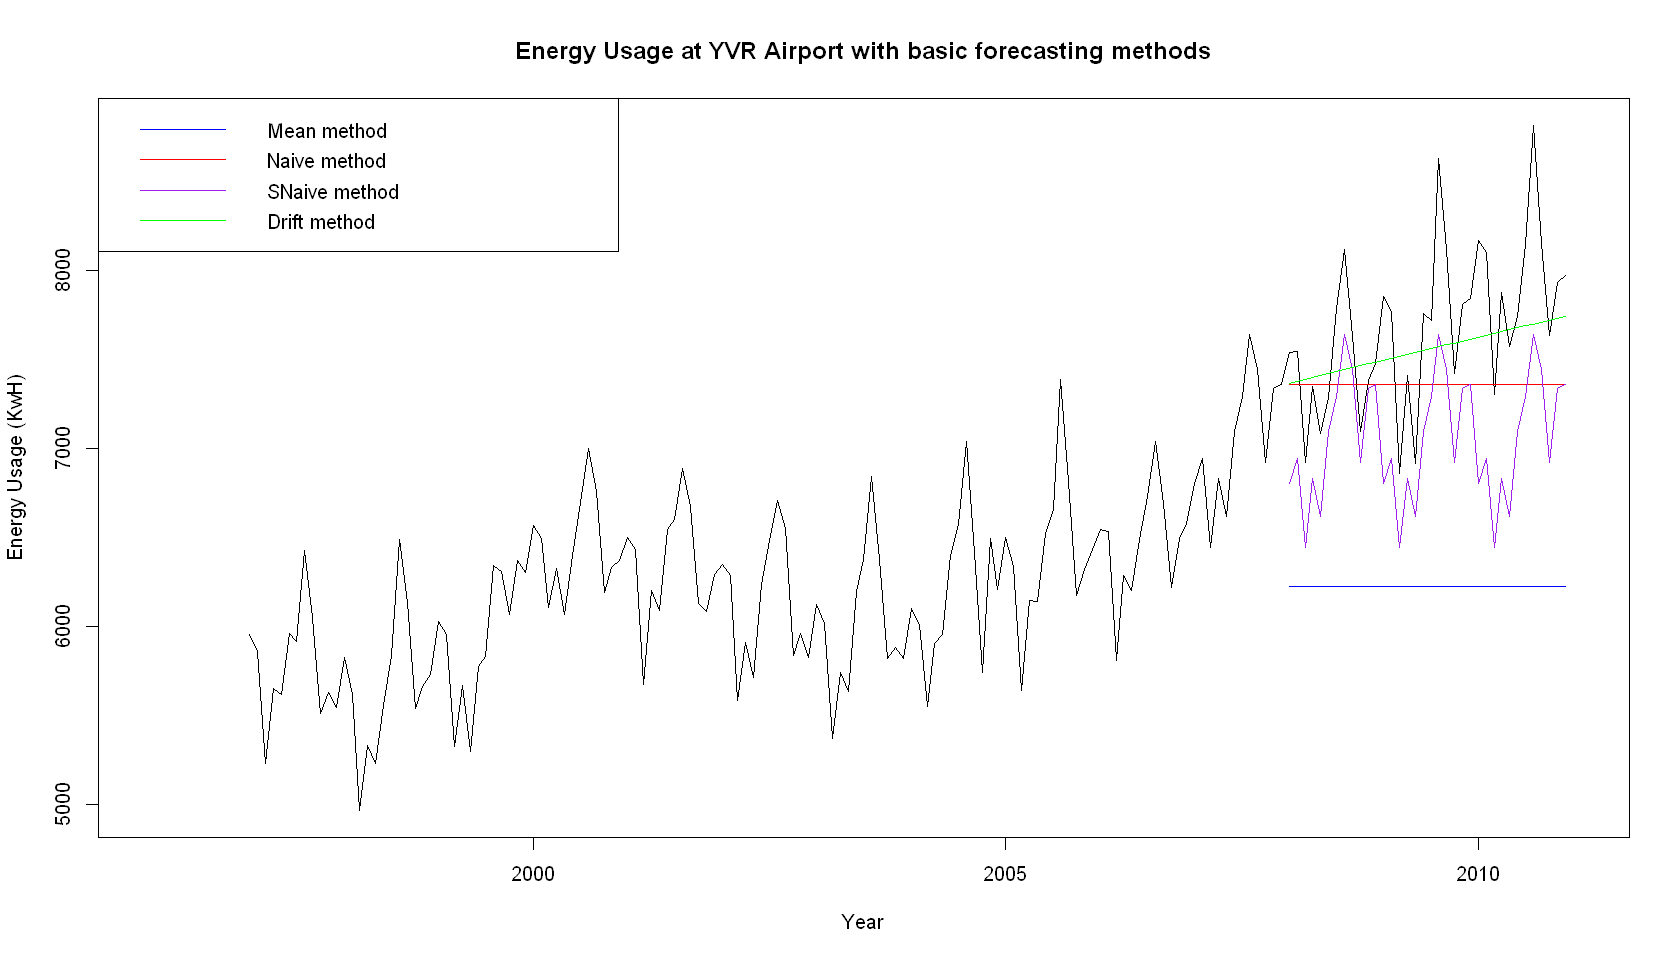

In [264]:
yvr.fit1 <- meanf(ts_data.train, h=36)
yvr.fit2 <- naive(ts_data.train, h=36)
yvr.fit3 <- snaive(ts_data.train, h=36)
yvr.fit4 <- rwf(ts_data.train,drift=TRUE,h=36)

plot(ts_data,main="Energy Usage at YVR Airport with basic forecasting methods", 
     ylab = "Energy Usage (KwH)",xlab="Year", xlim = c(1996, 2011))
lines(meanf(ts_data.train,h=36)$mean,col='blue')
lines(rwf(ts_data.train,h=36)$mean,col='red')
lines(snaive(ts_data.train, h=36)$mean, col='purple')
lines(rwf(ts_data.train,drift=TRUE,h=36)$mean,col='green')
legend("topleft",lty=1,col=c('blue','red','purple','green'), 
       legend=c("Mean method","Naive method","SNaive method","Drift method"))

## Accuracy measures

In [265]:
method <- c("mean method", "naive method", "seasonal naive method", "drift method")
cbind(method, rbind(accuracy(yvr.fit1, ts_data.test)[2,c(2,3,5,6)],
                    accuracy(yvr.fit2, ts_data.test)[2,c(2,3,5,6)],
                    accuracy(yvr.fit3, ts_data.test)[2,c(2,3,5,6)],
                    accuracy(yvr.fit4, ts_data.test)[2,c(2,3,5,6)]))

method,RMSE,MAE,MAPE,MASE
mean method,1528.49822382884,1463.79545454545,18.7755758201661,5.52410386016273
naive method,550.058809987118,443.194444444444,5.60345284112793,1.67253705683796
seasonal naive method,698.657283652006,626.833333333333,8.03862417905933,2.36555758223788
drift method,415.979012553523,328.482400339271,4.21328577080877,1.23963419210996


## Comparison of basic methods

According to the accuracy measures, all the factors RMSE, MAE, MAPE and MASE point to the fact that drift method is the best predictor for this particular dataset as these factors are significantly lower for this method. A MASE value greater than 1 (1.24 for drift) means the forecast error is larger than the average deviation of the actual data, indicating that the forecast is less accurate than a simple naive method.

----

<div class="alert alert-block alert-success">

# Exponential Smoothing (ETS) model    
<a id="ETS"></a>

</div>    

## ETS(__, __, __) model

In [266]:
yvr.hwa1 <- hw(ts_data.train, h=36, seasonal="additive")
yvr.hwa2 <- hw(ts_data.train, h=36, seasonal="additive", damped=TRUE)
yvr.auto.ets <- ets(ts_data.train)

In [267]:
accuracy(forecast(yvr.hwa1, 36)$mean, ts_data.test)
accuracy(forecast(yvr.hwa2, 36)$mean, ts_data.test)
accuracy(forecast(yvr.auto.ets, 36)$mean, ts_data.test)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,78.01371,188.9986,155.896,0.9297774,2.003689,0.3082293,0.3928985


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,288.4267,381.1752,312.7213,3.630139,3.96709,0.6432331,0.7829167


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,291.0986,386.4068,315.9373,3.665516,4.009293,0.6651536,0.7933645


##### The best ETS model is ETS(A,A,A)

## Estimates of the smoothing parameters

In [268]:
summary(yvr.hwa1)


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = ts_data.train, h = 36, seasonal = "additive") 

  Smoothing parameters:
    alpha = 0.7846 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5879.3546 
    b = 12.3652 
    s = -36.7977 -27.2016 -238.1219 321.0426 666.3048 232.4424
           58.5104 -349.8579 -192.2142 -564.3842 38.3341 91.9432

  sigma:  134.6878

     AIC     AICc      BIC 
1955.855 1961.224 2004.863 

Error measures:
                    ME     RMSE      MAE         MPE     MAPE      MASE
Training set -1.171192 126.2613 98.95847 -0.06213835 1.594299 0.3734517
                    ACF1
Training set 0.005411505

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2008       7485.996 7313.387 7658.605 7222.013 7749.979
Feb 2008       7444.636 7225.222 7664.050 7109.071 7780.200
Mar 2008       6854.252 6596.383 7112.120 6459.876 7248.627
Apr 2008       7238.806 6947.507 

#### Smoothing parameters:
1. alpha = 0.7846 
2. beta  = 1e-04 
3. gamma = 1e-04 

After evaluating the data and analyzing the trend and seasonality patterns, we selected the ETS(A,A,A) model. This was based on the observation that the trend and seasonality in the decomposition chart had additive properties. The ETS(A,A,A) model is well-suited for this type of data, as it assumes an additive relationship between the trend, seasonality, and residuals. By choosing this model, we were able to effectively capture the underlying patterns in the data and make more accurate predictions.

## Model plot

Showing the fitted values of the model graphed in blue and the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.


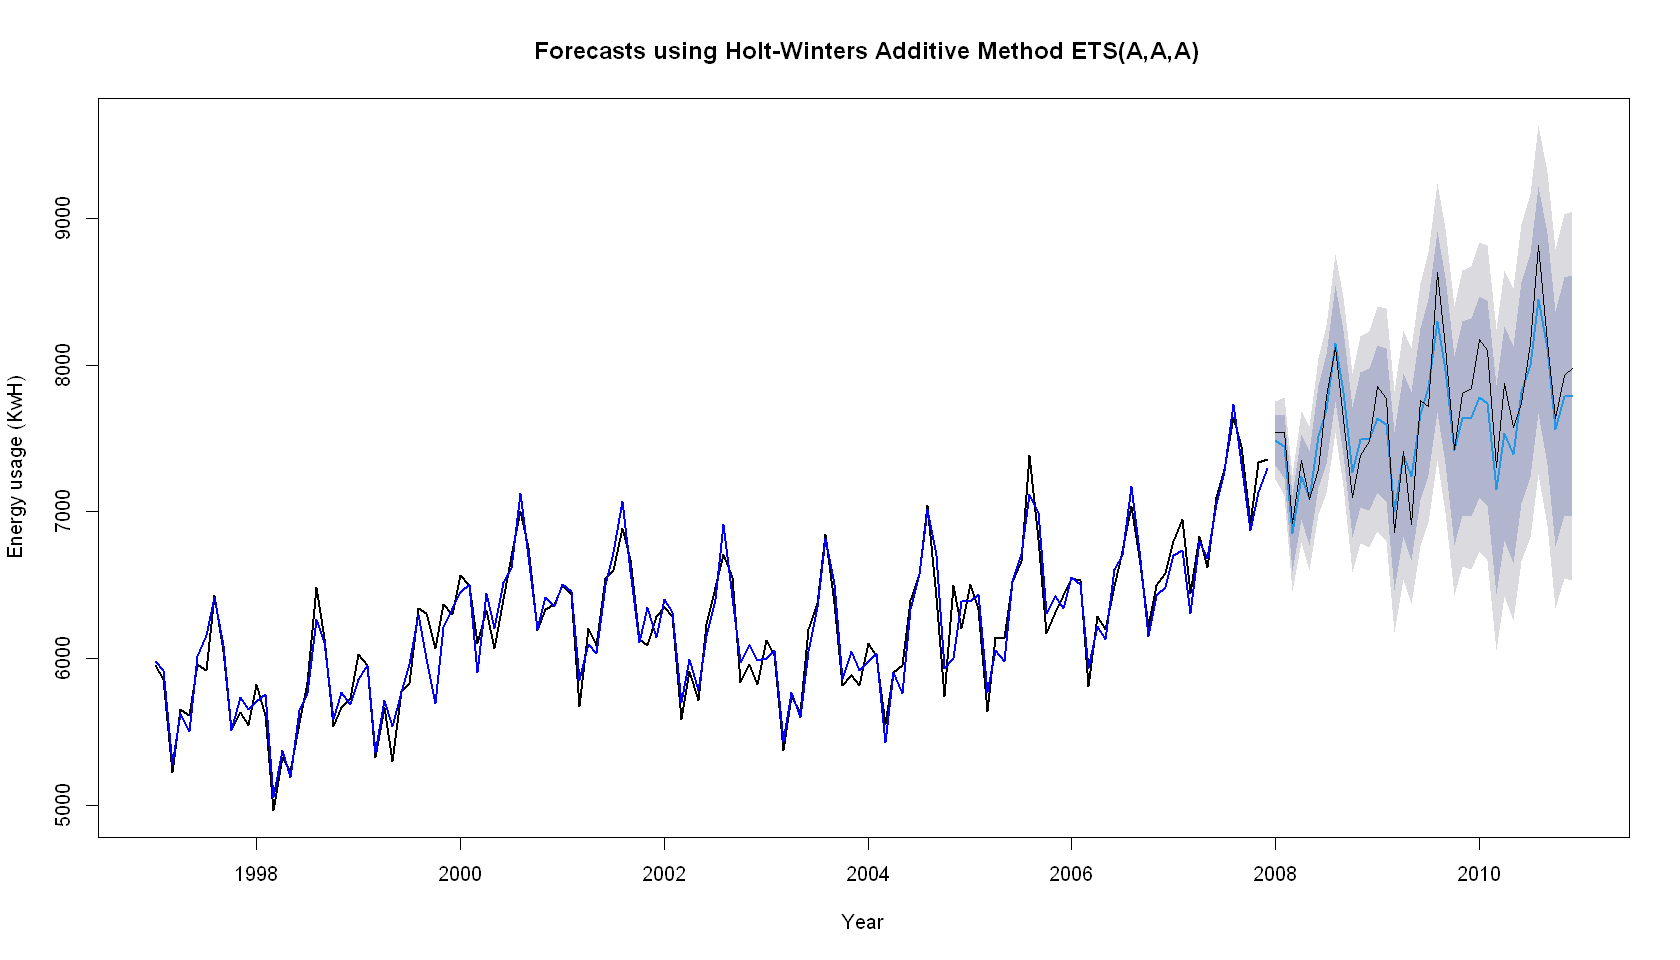

In [269]:
plot(forecast(yvr.hwa1), main=" Forecasts using Holt-Winters Additive Method ETS(A,A,A)", 
     ylab="Energy usage (KwH)", xlab="Year", lw=2)
lines(ts_data.test)
lines(fitted(yvr.hwa1), col="blue", lw=2)

## Goodness of fit

In [270]:
accuracy(forecast(sbest))
accuracy(forecast(yvr.hwa1))
accuracy(forecast(yvr.hwa2))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,12.73609,126.6517,98.09986,0.1709555,1.569775,0.3702114,-0.0144411


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-1.171192,126.2613,98.95847,-0.06213835,1.594299,0.3734517,0.005411505


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,9.048528,126.7748,99.15104,0.1037289,1.59089,0.3741784,-0.01026726


When evaluating the performance of three different models using the RMSE, MAE, MAPE, and MASE metrics, we observed that most of the values are relatively similar across all three models. However, there are some exceptions, such as the MAE, MAPE, and MASE values for the "sbest" model being lower than the other models. However, these differences are not significant enough to make a definitive decision on which model is the best. 

## Accuracy measures

In [271]:
accuracy(forecast(yvr.hwa1, 36)$mean, ts_data.test)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,78.01371,188.9986,155.896,0.9297774,2.003689,0.3082293,0.3928985


## Accuracy of forecasts

In [272]:
accuracy(forecast(yvr.hwa1, 36), ts_data.test)
method <- c("mean method", "naive method", "seasonal naive method", "drift method")
cbind(method, rbind(accuracy(yvr.fit1, ts_data.test)[2,c(2,3,5,6)],
                    accuracy(yvr.fit2, ts_data.test)[2,c(2,3,5,6)],
                    accuracy(yvr.fit3, ts_data.test)[2,c(2,3,5,6)],
                    accuracy(yvr.fit4, ts_data.test)[2,c(2,3,5,6)]))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-1.171192,126.2613,98.95847,-0.06213835,1.594299,0.3734517,0.005411505,NA
Test set,78.013711,188.9986,155.89604,0.92977736,2.003689,0.5883240,0.308229307,0.3928985


method,RMSE,MAE,MAPE,MASE
mean method,1528.49822382884,1463.79545454545,18.7755758201661,5.52410386016273
naive method,550.058809987118,443.194444444444,5.60345284112793,1.67253705683796
seasonal naive method,698.657283652006,626.833333333333,8.03862417905933,2.36555758223788
drift method,415.979012553523,328.482400339271,4.21328577080877,1.23963419210996


The chosen model showed significantly lower error values on the test set compared to the other two models that were tested. The RMSE, MAE, and MAPE values were all notably lower, and this was the only model with a MASE value less than 1. When compared to the drift method, which was the best among the four basic methods, this model still outperformed it in every aspect.

## Residual diagnostics

- Having a negative residual means that the predicted value is a litle on the higher side and under-predicting the values by an average of 1.17.

- The variance of the residuals, which is the measure of the spread of the residual values, is found to be relatively consistent across time. This stability in the residual variance is a desirable characteristic, as it indicates that the model's predictions are consistent and not excessively swayed by a few outliers. Additionally, a normal distribution of the residuals is observed, meaning that the residual values are evenly distributed around the mean. This is another indication that the model is producing reasonable and accurate predictions. 
However, despite the relatively constant variance and normal distribution of the residuals, one significant autocorrelation factor has been detected. Autocorrelation refers to the degree of similarity between values in a time series. A significant autocorrelation factor suggests that there may be some underlying pattern in the residuals that the model has not captured, and this can lead to inaccurate predictions in the future.

- The null hypothesis in these tests states that the first h autocorrelations are not distinguishable from a white noise process. We performed the Box-Ljung test to determine if the residuals have any autocorrelation. We see that the lags used is 24, meaning we tested for 24 lags. The results of the tests showed test statistics of 14.031 and p-value of 0.9459. Therefore, we cannot reject the null hypothesis, indicating that there is no statistical evidence to suggest that the first 24 lags of the residuals are autocorrelated or distinct from a white noise process.

[1] -1.171192


	Ljung-Box test

data:  Residuals from Holt-Winters' additive method
Q* = 14.031, df = 8, p-value = 0.08095

Model df: 16.   Total lags used: 24



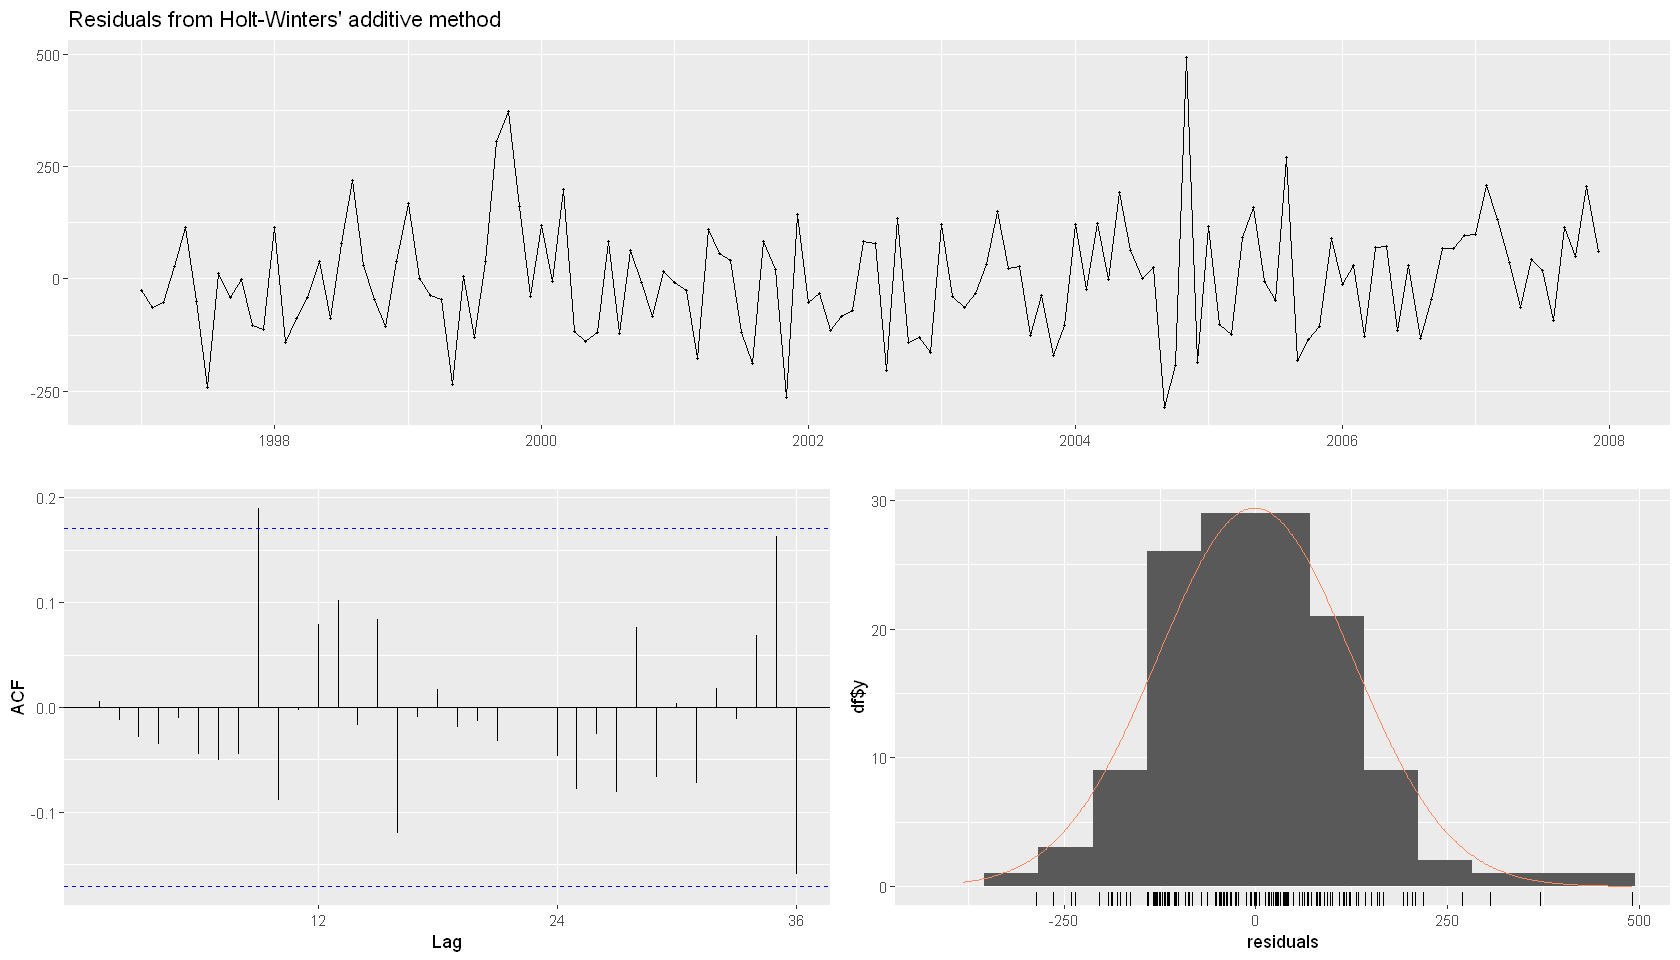

In [273]:
res <- residuals(yvr.hwa1)
mean.res <- mean(res, na.rm=TRUE)
mean.res
checkresiduals(yvr.hwa1)

In [274]:
Box.test(residuals(yvr.hwa1), type="Ljung", lag=24)


	Box-Ljung test

data:  residuals(yvr.hwa1)
X-squared = 14.031, df = 24, p-value = 0.9459


----

<div class="alert alert-block alert-success">
<a id="ARIMA"></a>
    
# ARIMA model
    
# Fitting an ARIMA model to the training set
    
</div>    

## ARIMA(p, d, q)X(P, D, Q)m model

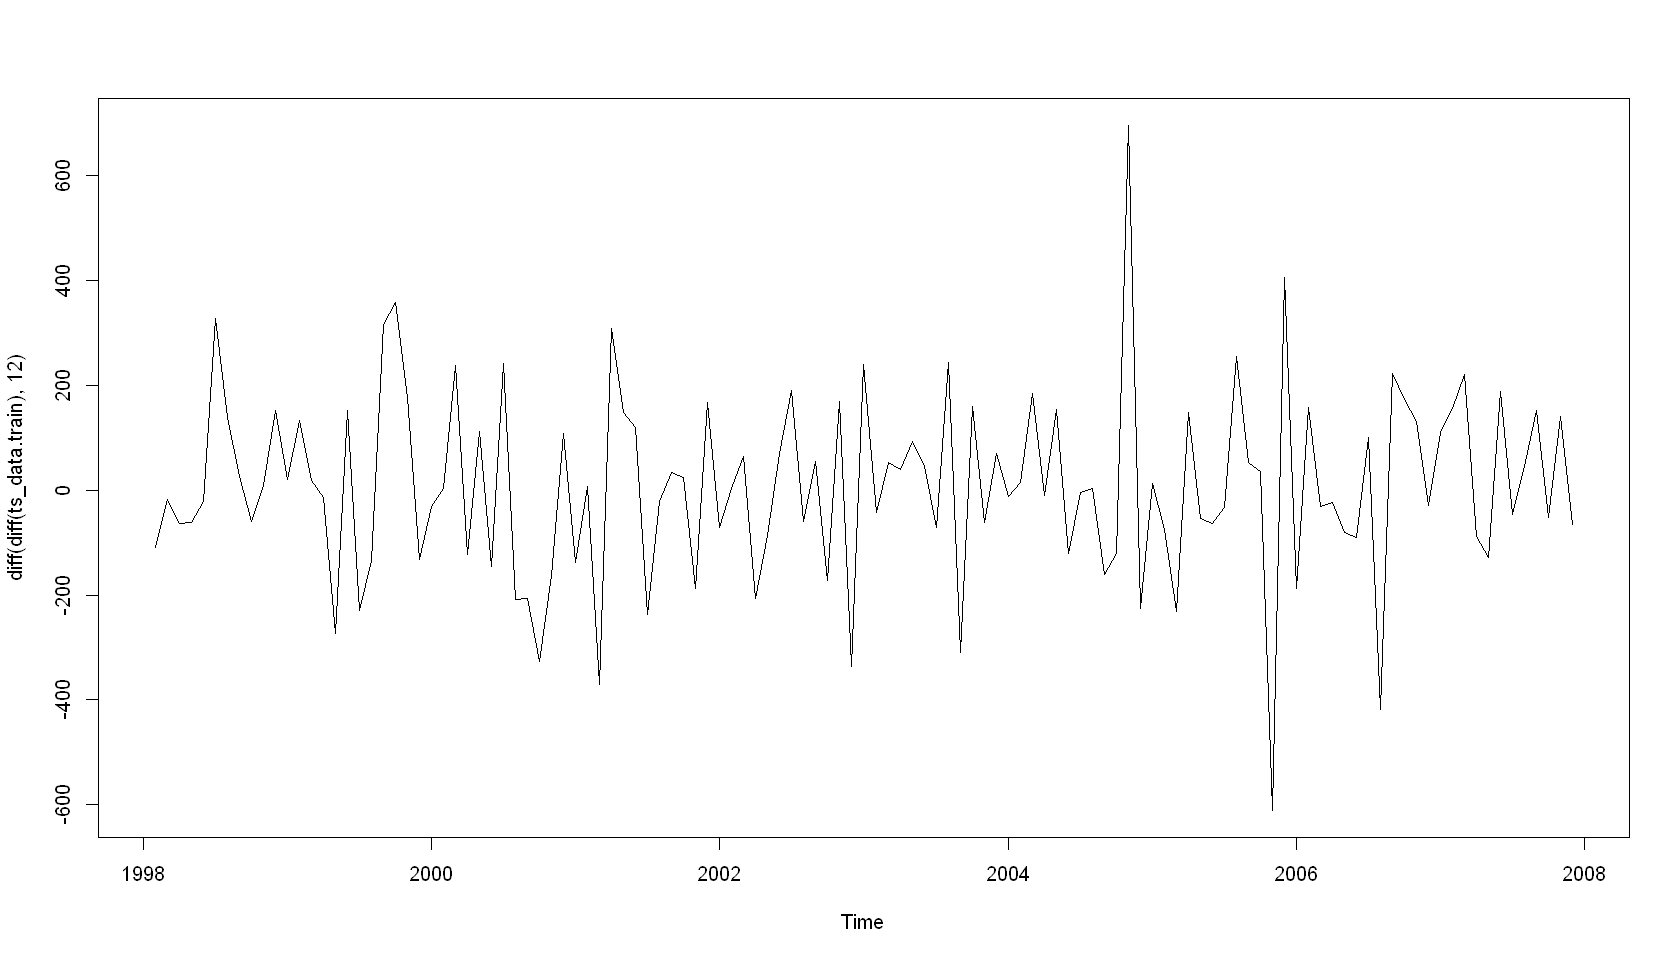

In [275]:
plot(diff(diff(ts_data.train), 12))

In [276]:
yvr.fit.auto.arima <- auto.arima(ts_data.train, stepwise=FALSE, approximation=FALSE)
yvr.fit.arima1 <- Arima(ts_data.train, order=c(1, 1, 0), seasonal=c(3, 1, 0))
yvr.fit.arima2 <- Arima(ts_data.train, order=c(0, 1, 1), seasonal=c(0, 1, 3))
yvr.fit.arima3 <- Arima(ts_data.train, order=c(0, 1, 1), seasonal=c(0, 1, 1))

accuracy(forecast(yvr.fit.auto.arima, 36)$mean, ts_data.test)
accuracy(forecast(yvr.fit.arima1, 36)$mean, ts_data.test)
accuracy(forecast(yvr.fit.arima2, 36)$mean, ts_data.test)
accuracy(forecast(yvr.fit.arima3, 36)$mean, ts_data.test)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-459.5773,532.0309,459.5773,-5.985599,5.985599,0.6253826,1.101258


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-466.5637,513.3184,466.5637,-6.092383,6.092383,0.5211293,1.07345


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-77.20118,173.1076,126.4155,-1.082724,1.676984,0.1660076,0.3678171


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,8.735463,161.6306,128.2304,0.03287632,1.668487,0.2380257,0.3400212


##### Using the notation of ARIMA(p,d,q)x(P,D,Q), the best model is <b>ARIMA(0,1,1)x(0,1,1)[12]

## Estimates of the parameters

In [277]:
summary(yvr.fit.arima3)

Series: ts_data.train 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.2021  -0.9006
s.e.   0.0909   0.1912

sigma^2 = 18710:  log likelihood = -762.5
AIC=1531   AICc=1531.21   BIC=1539.33

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 9.851918 128.7797 94.25649 0.1303166 1.499484 0.3557073
                     ACF1
Training set -0.006835481

#### Parameters are -
1. ma1 = -0.2021
2. sma1 = -0.9006
3. AICc = 1531.21

## Appropriateness of model
Included the ACF and PACF plots of the differenced data

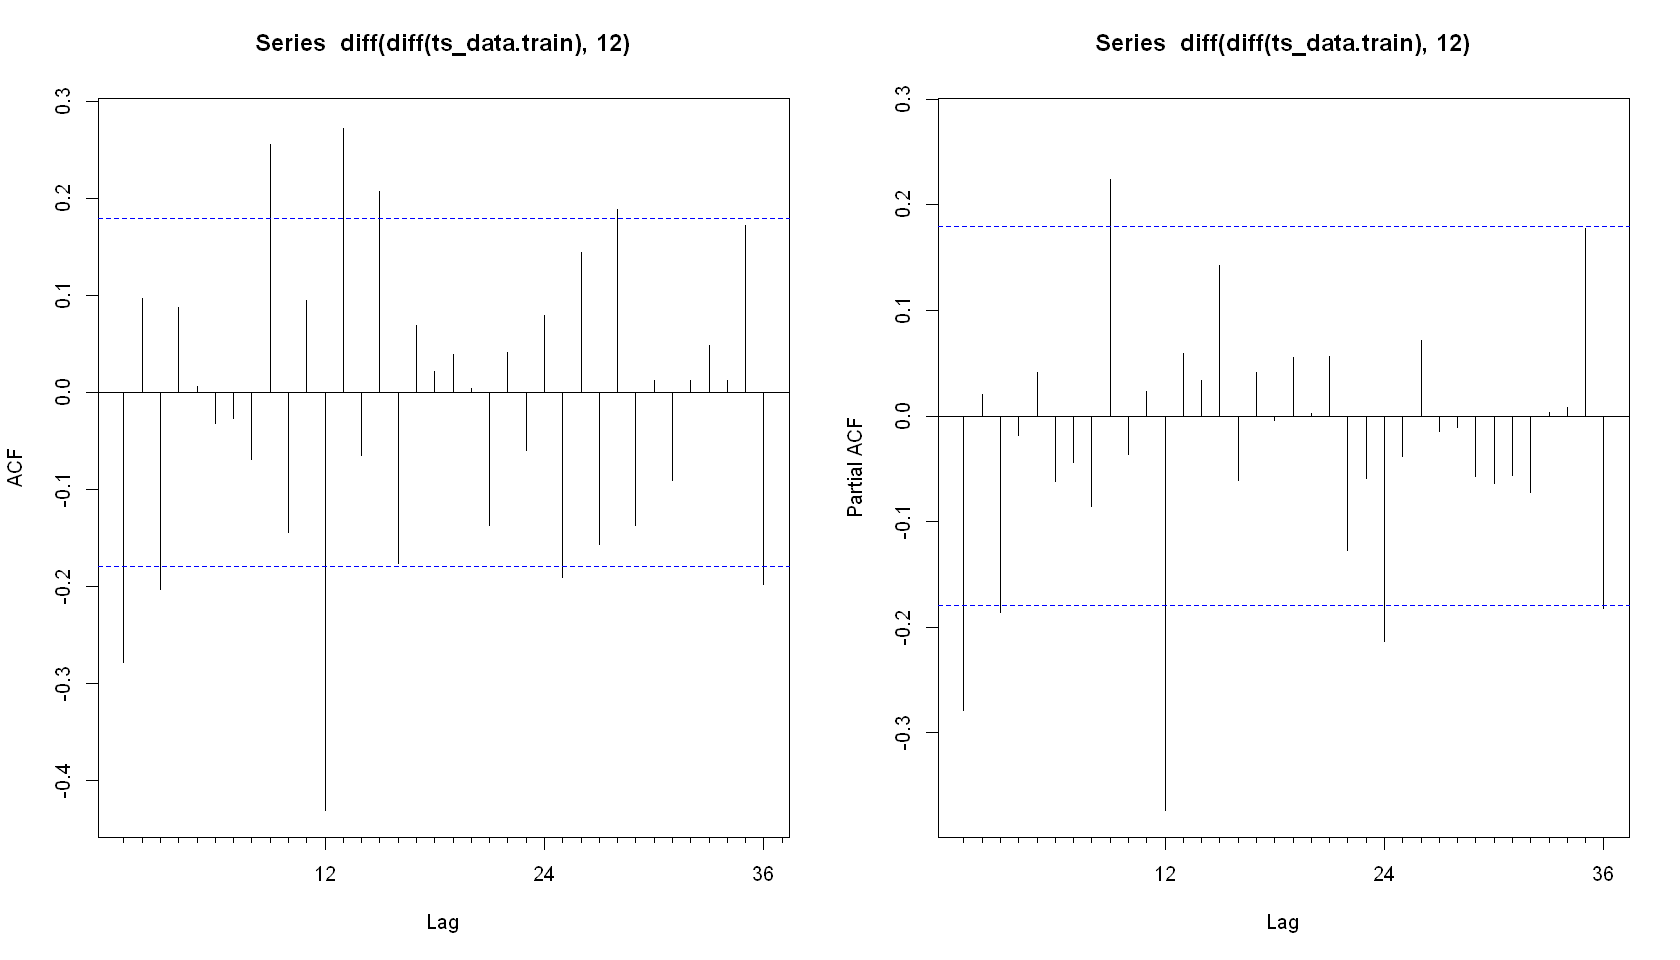

In [278]:
par(mfrow=c(1,2))

Acf(diff(diff(ts_data.train), 12), lag=36)
Pacf(diff(diff(ts_data.train), 12), lag=36)

As we know from the original time series that there's both trend and seasonality, to apply the ARIMA model, we must make the series stationary. After performing differencing for both the trend and seasonality, the data seemed reasonably stationary for us to conduct ARIMA. Our best ARIMA model was ARIMA(0, 1, 1)X(0, 1, 1)12, which used the Moving Average (MA) method for both the non-seasonal and seasonal parts. The Autocorrelation Function (ACF) plot showed that lag 12 was significant but lag 24 was not. As a result, we chose the model with a seasonal MA component for the seasonal lag of 1 (Q=1) and seasonal differencing of 1 (D=1). No AR component is used. We also see the significant lags before lag 12 in the ACF plot, that lag 1 was significant but lag 2 wasn't. So, we tried a model with a non-seasonal MA component for lag 1 (q=1) and non-seasonal differencing of 1 (d=1), with no AR component used for the non-seasonal component (p=0).

## Model plot

Showing the fitted values of the model graphed in blue and the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.


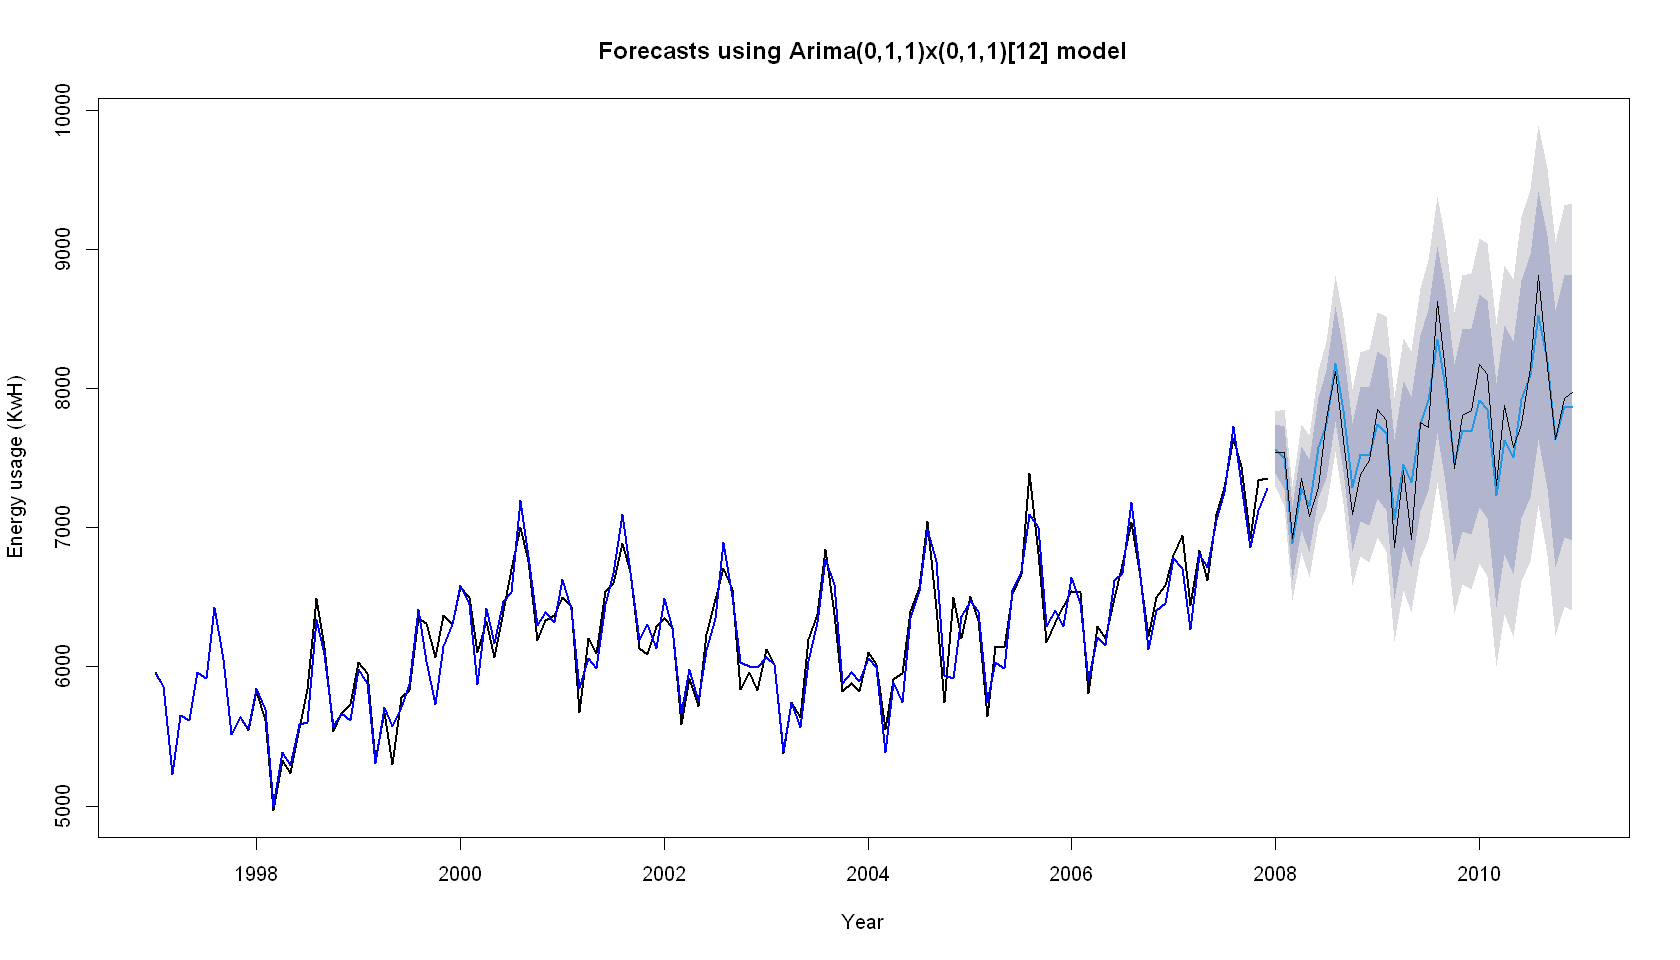

In [279]:
plot(forecast(yvr.fit.arima3, 36), main="Forecasts using Arima(0,1,1)x(0,1,1)[12] model", 
     ylab="Energy usage (KwH)", xlab="Year", lw=2)
lines(ts_data.test)
lines(fitted(yvr.fit.arima3), col="blue", lw=2)

## Goodness of fit

In [280]:
accuracy(forecast(yvr.fit.auto.arima))
accuracy(forecast(yvr.fit.arima1))
accuracy(forecast(yvr.fit.arima2))
accuracy(forecast(yvr.fit.arima3))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,9.902709,146.2229,104.9458,0.1326502,1.668495,0.3960468,-0.008078189


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,10.77114,137.3672,99.2031,0.1439112,1.57788,0.3743749,-0.004502078


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,10.11589,124.3413,90.54206,0.135486,1.441943,0.3416896,-0.008447282


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,9.851918,128.7797,94.25649,0.1303166,1.499484,0.3557073,-0.006835481


When evaluating the performance of four different models using the AICc value,its lowest for Arima(0,1,1)x(0,1,1)[12], indicating this is the best model to choose. Based on other measures like RMSE, MAE, MAPE, and MASE metrics, we observe that our third model (which is again Arima(0,1,1)x(0,1,3)[12]) has an RMSE of 124.34 and MAPE of 1.442 , which is lower than all other models. However, its hard to say if this model would give the best forecasts on the test set as this training fit can indicate overfitting and hence lower RMSE.

## Accuracy measures

In [281]:
accuracy(forecast(yvr.fit.arima3, 36)$mean, ts_data.test)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,8.735463,161.6306,128.2304,0.03287632,1.668487,0.2380257,0.3400212


## Accuracy of forecasts

In [282]:
accuracy(forecast(yvr.fit.arima3, 36)$mean, ts_data.test)
accuracy(forecast(yvr.hwa1, 36)$mean, ts_data.test)
method <- c("mean method", "naive method", "seasonal naive method", "drift method")
cbind(method, rbind(accuracy(yvr.fit1, ts_data.test)[2,c(2,3,5,6)],
                    accuracy(yvr.fit2, ts_data.test)[2,c(2,3,5,6)],
                    accuracy(yvr.fit3, ts_data.test)[2,c(2,3,5,6)],
                    accuracy(yvr.fit4, ts_data.test)[2,c(2,3,5,6)]))

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,8.735463,161.6306,128.2304,0.03287632,1.668487,0.2380257,0.3400212


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,78.01371,188.9986,155.896,0.9297774,2.003689,0.3082293,0.3928985


method,RMSE,MAE,MAPE,MASE
mean method,1528.49822382884,1463.79545454545,18.7755758201661,5.52410386016273
naive method,550.058809987118,443.194444444444,5.60345284112793,1.67253705683796
seasonal naive method,698.657283652006,626.833333333333,8.03862417905933,2.36555758223788
drift method,415.979012553523,328.482400339271,4.21328577080877,1.23963419210996


Visually, the ARIMA model is able to capture both the trend and seasonality in the forecasted values, which is also confirmed by the accuracy measures such as RMSE, MAE, MAPE, and MASE. Out of the basic methods, the drift method was the best both visually and in terms of accuracy measures but the ARIMA(0, 1, 1)X(0, 1, 1)12 model showed significant improvement in forecasting the test set compared to the drift method. The values of RMSE, MAE, MAPE, and MASE for the drift method are almost two and a half times higher than the ARIMA method. And ARIMA also performs better than our best ETS model. 

## Residual diagnostics

- The mean of the residuals is 9.852. This value is fairly close to zero when compared to the scale of residuals, indicating no bias. There is no visible pattern left in the residuals as well and they have approximately constant variance.

- The checkresiduals function has shown that all four properties of the residuals have been fulfilled. These properties are: the residuals are uncorrelated, the residuals have a mean of zero, the residuals have a constant variance, and the residuals are normally distributed.

- The null hypothesis in these tests states that the first h autocorrelations are not distinguishable from a white noise process. In the checkresiduals() function, the Ljung-Box test is performed. It shows the lags used is 24. The results of the tests showed test statistics of 17.582 and p-value of 0.7305. Therefore, we cannot reject the null hypothesis, indicating that there is no statistical evidence to suggest that the first 24 lags of the residuals are autocorrelated or distinct from a white noise process.

[1] 9.851918


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,1)[12]
Q* = 17.582, df = 22, p-value = 0.7305

Model df: 2.   Total lags used: 24



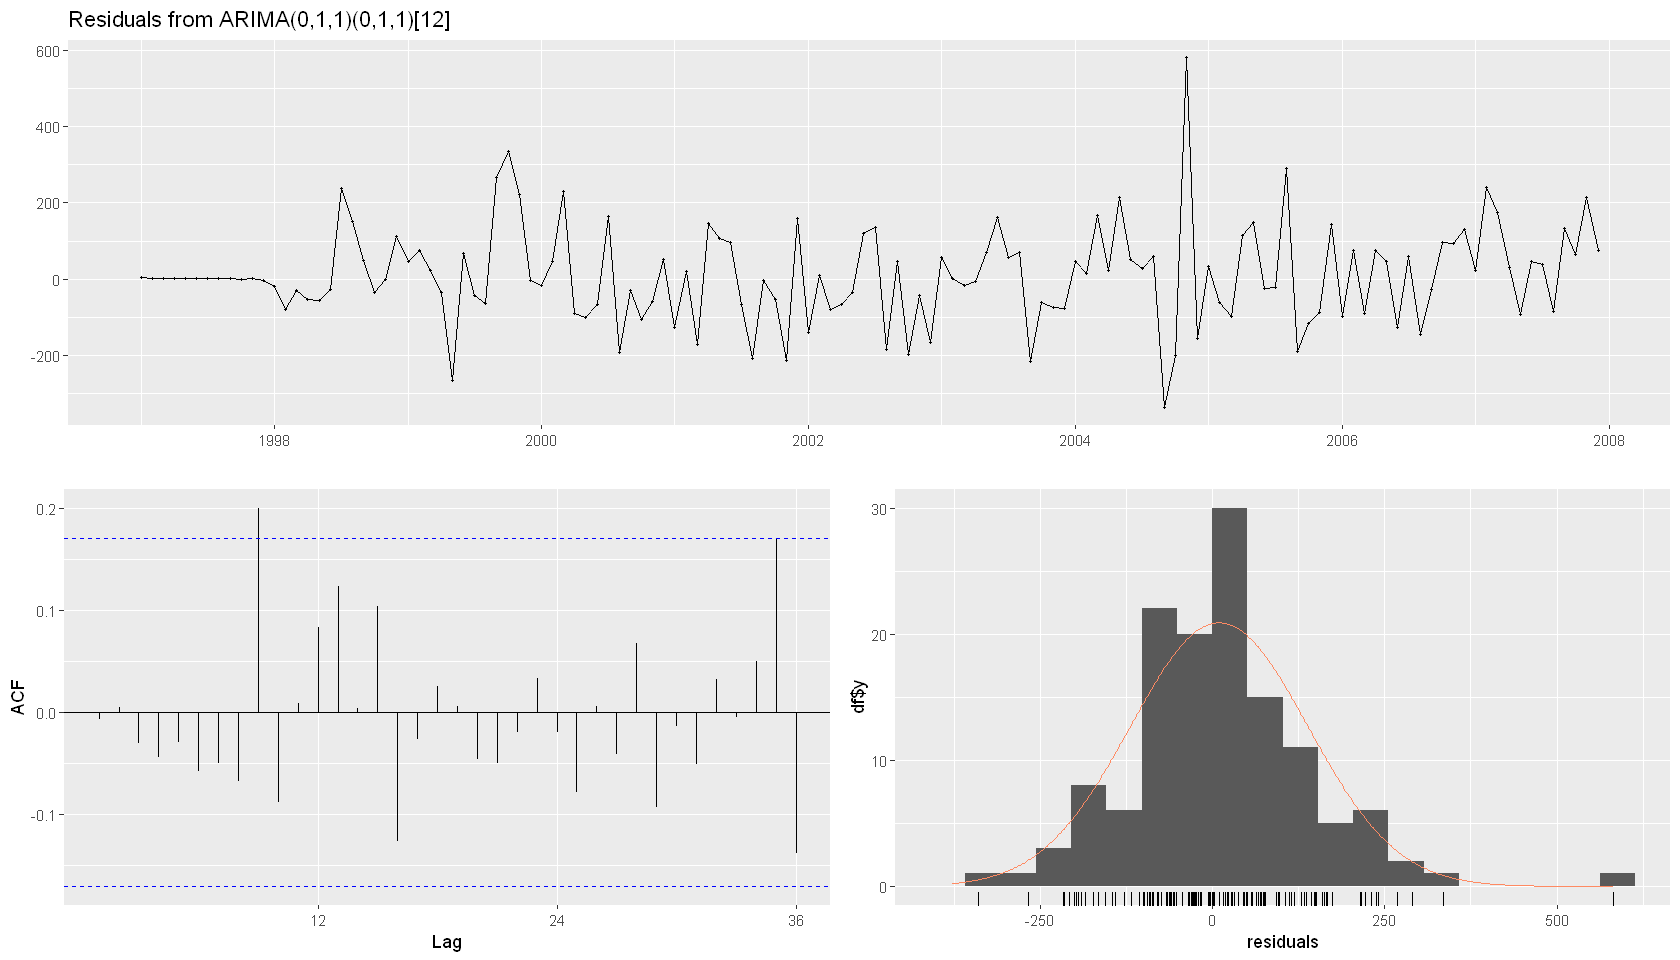

In [283]:
res <- residuals(yvr.fit.arima3)
mean.res <- mean(res, na.rm=TRUE)
mean.res
checkresiduals(yvr.fit.arima3)

----

<div class="alert alert-block alert-warning">
<a id="Comparison"></a>

# Comparison of models

Comparing the exponential smoothing/ETS model, ARIMA model, and the basic methods and using the best forecasting method as final model for subsequent sections.  
<div>


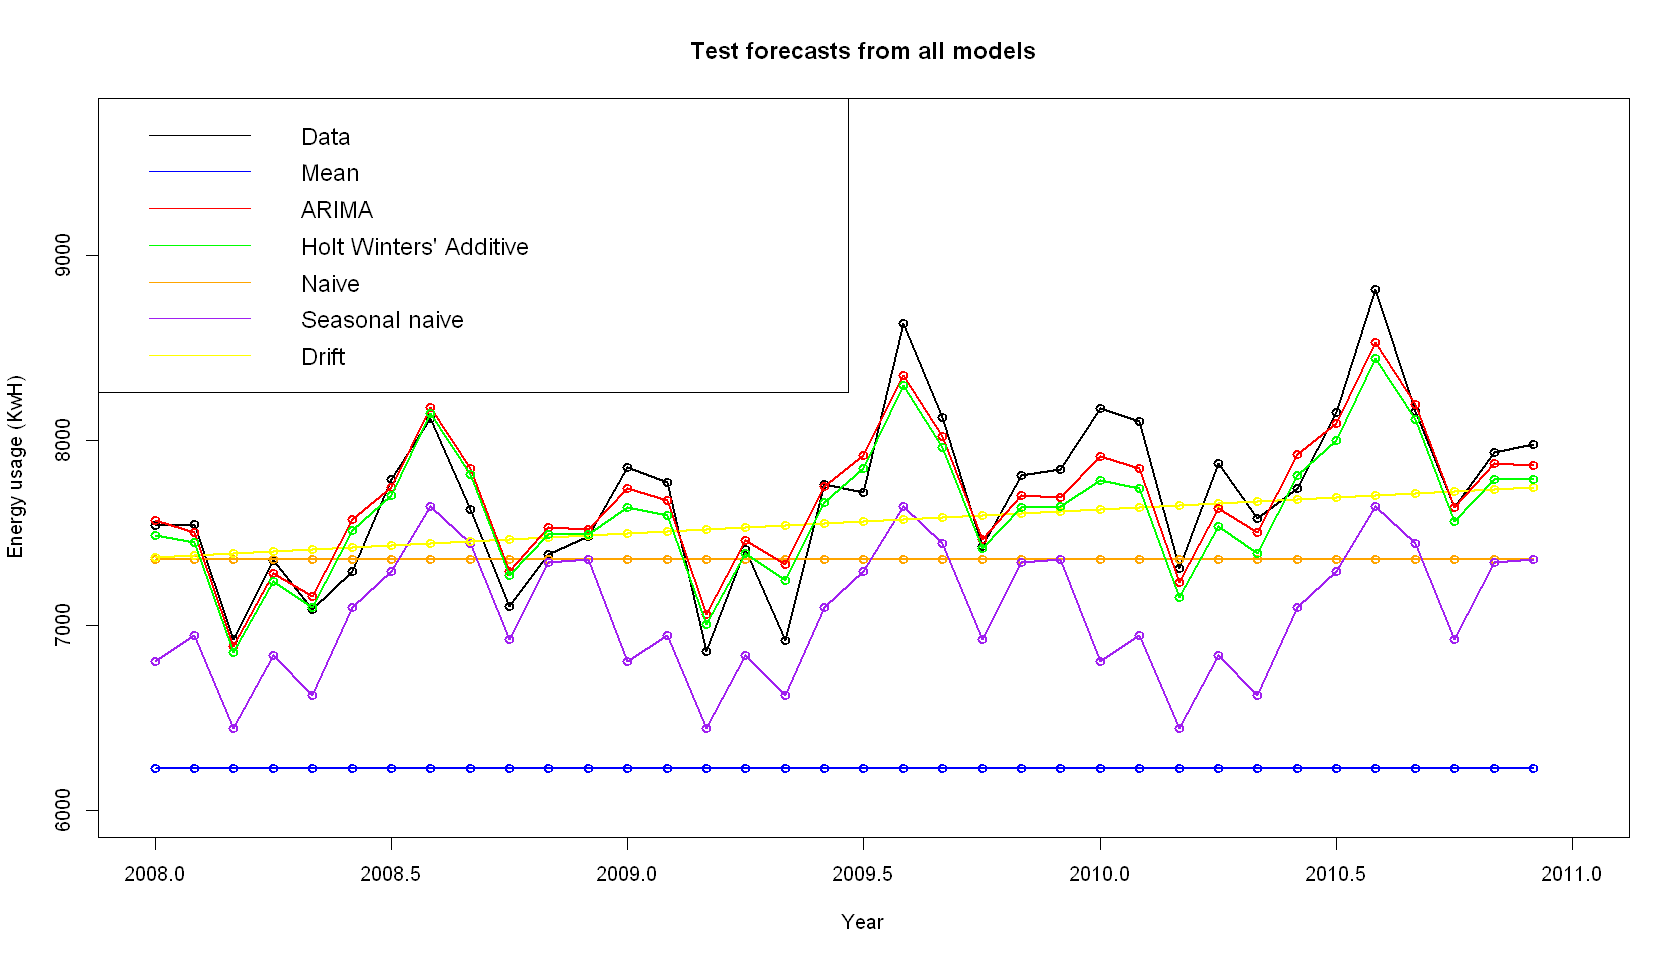

In [285]:
plot(ts_data.test, main="Test forecasts from all models", ylab="Energy usage (KwH)", type="o", xlab="Year", xlim=c(2008, 2011), ylim=c(6000, 9700),lw=2)
lines(forecast(yvr.fit1)$mean, type="o", col="blue", lw=2)
lines(forecast(yvr.fit2)$mean, type="o", col="orange", lw=2)
lines(forecast(yvr.fit3)$mean, type="o", col="purple", lw=2)
lines(forecast(yvr.fit4)$mean, type="o", col="yellow", lw=2)
lines(forecast(yvr.fit.arima3, 36)$mean, type="o", col="red", lw=2)
lines(forecast(yvr.hwa1, 36)$mean, type="o", col="green", lw=2)
legend("topleft",lty=1, col=c("black", "blue", "red", "green", "orange", "purple", "yellow"), 
       c("Data","Mean","ARIMA", "Holt Winters' Additive", "Naive", "Seasonal naive", "Drift"), cex=1.2)

Comparing the different forecasting methods, we find that the Arima model give us the best result. It has the lowest values for the forecasted error measures namely RMSE, MAE, MAPE, MASE. Visually too, we see that ARIMA model (Red) follows the data more closely than ETS model (Green). Specifically, ETS model is underestimating the seasonality compared to ARIMA and hence is less accurate. Mean method is the least effective of the lot as its forecasts are the farthest from the data. Naive method does a better job than mean and Seasonal naive but is slightly less accurate than the drift method, which is able to capture trend better than the other basic forecasting methods.         

<div class="alert alert-block alert-info"> 
<a id="Forecasts"></a>   
    
# Forecasts

Calculating the point forecasts using our final model for the next three years (January 2011 through December 2013) and also plotting the entire dataset with the forecasts from our best forecasting method, including prediction intervals.
</div>

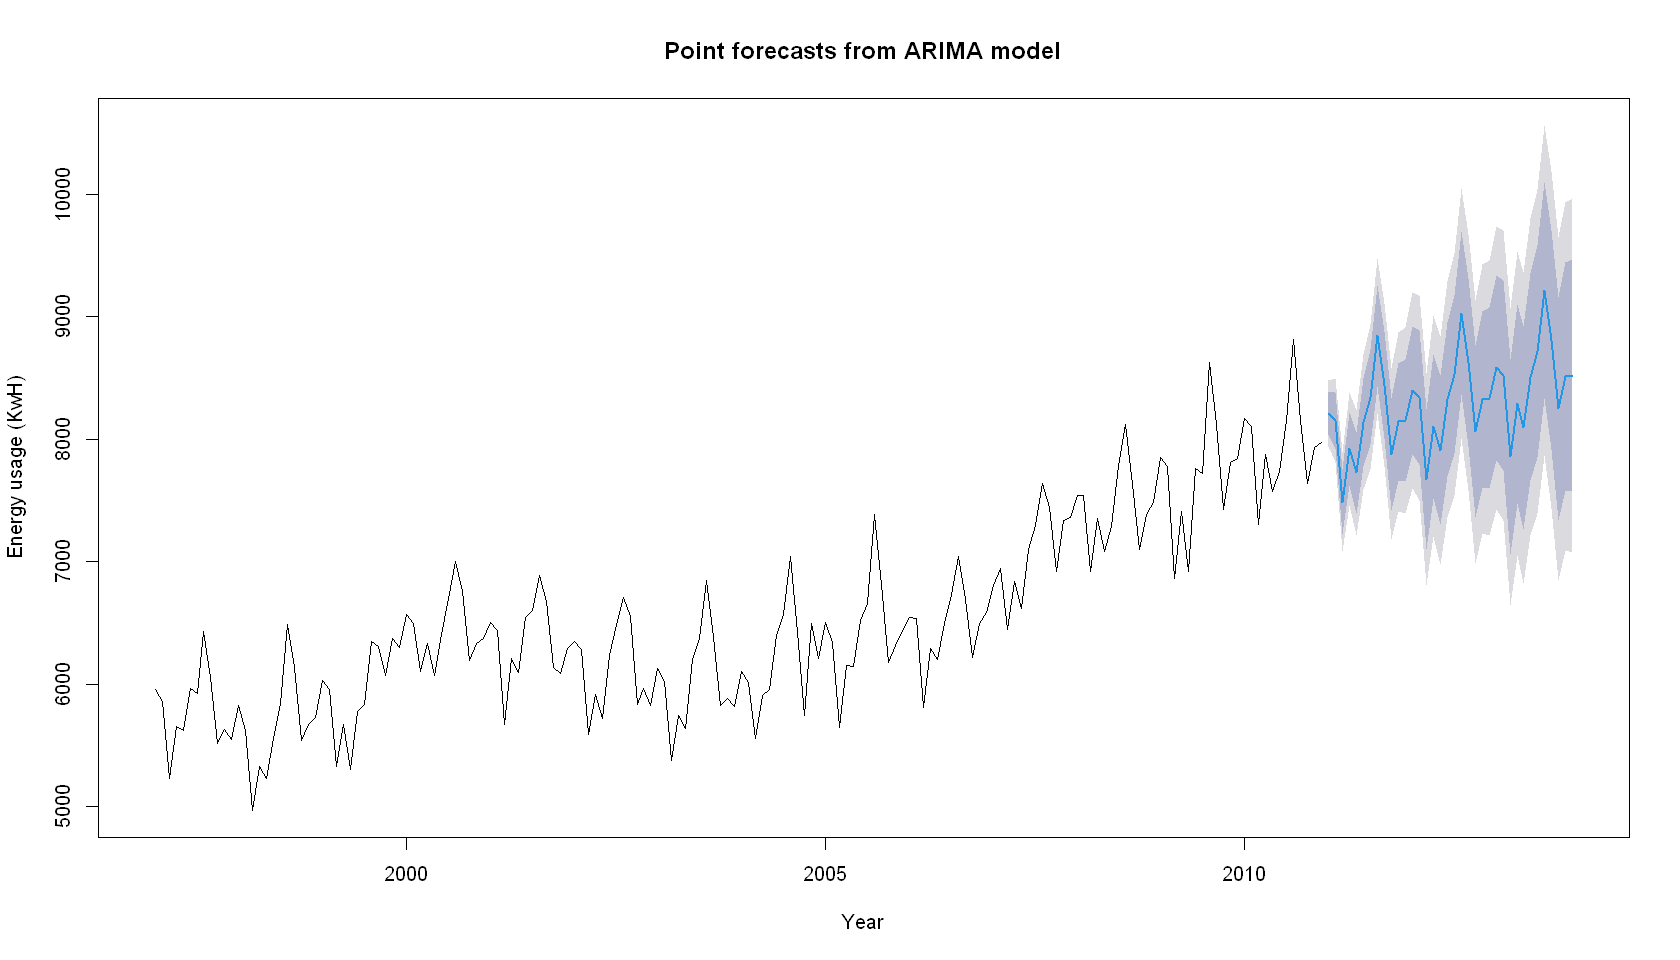

In [286]:
yvr.fit.arima3.future.forecasts <- forecast(Arima(ts_data, model=yvr.fit.arima3), h=36) 
plot(yvr.fit.arima3.future.forecasts, main="Point forecasts from ARIMA model", ylab="Energy usage (KwH)", 
     xlab="Year")

<div class="alert alert-block alert-warning">
<a id="Discussion"></a>

# Final Discussion 

<div>


Even though ARIMA model performs the best for this dataset, there are several limitations of ARIMA models that we need to deal with while choosing the best forecasting model. Some of them include - 

1. Stationarity assumption: To use ARIMA models, we must assume that the time series is stationary, meaning that the mean and variance are constant over time. Non-stationary time series can cause the model to produce incorrect predictions. To address this, the time series can be made stationary through a process called differencing. We can apply differencing techniques to both trend and seasonality.

2. Parameter (p,d,q) selection: ARIMA models also require the selection of three different parameters: the order of differencing (d), the number of autoregressive terms (p), and the number of moving average terms (q). Selecting the correct values for these parameters can be challenging, and incorrect choices can result in poor model performance. To address this, techniques such as grid search and automatic model selection, or even AIC/BIC can be used to find the optimal parameters. However, these don't guarantee better models which we also see in this case where Auto-Arima performs worse than manually chosen parameters. 

3. Univariate nature: The ARIMA model only considers one time series, and does not account for the influence of other variables on the time series being analyzed. To address this limitation, we can consider using explanatory models which take into account more than one independent variables.  


<div class="alert alert-block alert-success">
<a id="Explanatory"></a>

# Explanatory model
 
</div>

### Explanatory model for Energy consumed (KwH)

**Steps**:
1. First we choose the explanatory variable using correlation or other measures like Adjusted R2. Based on this data, I'd choose total passengers as the explanatory variable as it is highly correlated and shows similar trend to Energy usage.   
2. Once the explanatory variable is chosen, we can create an ETS/ARIMA model to forecast Total Passengers and check the residuals as well.   
3. Using these forecasted values of Total Passengers for the test set in the explanatory model, we can predict the Energy usage for the test set time period (using the linear regression model between Energy usage and Total Passengers). 
4. Finally, we can use different accuracy measures to assess how good these forecasts of the test set are compared to all our previous models like ETS/ARIMA and basic forecasting methods.  

----

<div class="alert alert-block alert-danger">
<a id="AppendixA"></a>

# Appendix A:
# ETS models
</div>

In [290]:
summary(yvr.hwa2)


Forecast method: Damped Holt-Winters' additive method

Model Information:
Damped Holt-Winters' additive method 

Call:
 hw(y = ts_data.train, h = 36, seasonal = "additive", damped = TRUE) 

  Smoothing parameters:
    alpha = 0.7931 
    beta  = 1e-04 
    gamma = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 5805.4605 
    b = 13.8363 
    s = -38.863 -43.2456 -244.5015 321 668.5009 230.8187
           64.3729 -346.505 -192.5901 -569.7257 56.5732 94.1651

  sigma:  135.8223

     AIC     AICc      BIC 
1958.927 1964.980 2010.817 

Error measures:
                   ME     RMSE      MAE       MPE    MAPE      MASE        ACF1
Training set 9.048528 126.7748 99.15104 0.1037289 1.59089 0.3741784 -0.01026726

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2008       7479.370 7305.306 7653.433 7213.163 7745.576
Feb 2008       7442.693 7220.519 7664.866 7102.908 7782.478
Mar 2008       6817.430 6555.841 7079.019 6417.365 7217.495
Apr 2008       7195.566 689

In [288]:
summary(yvr.auto.ets)

ETS(A,N,A) 

Call:
 ets(y = ts_data.train) 

  Smoothing parameters:
    alpha = 0.8142 
    gamma = 1e-04 

  Initial states:
    l = 6028.2465 
    s = -53.9951 -35.1353 -238.2527 322.9962 671.4127 226.3734
           66.8415 -359.4489 -191.2235 -589.7391 56.3954 123.7755

  sigma:  133.9544

     AIC     AICc      BIC 
1952.670 1956.808 1995.912 

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 12.73609 126.6517 98.09986 0.1709555 1.569775 0.3702114 -0.0144411

<div class="alert alert-block alert-danger">
<a id="AppendixB"></a>

# Appendix B:
# ARIMA Models
</div>

In [291]:
summary(yvr.fit.auto.arima)

Series: ts_data.train 
ARIMA(1,1,0)(2,1,0)[12] 

Coefficients:
          ar1     sar1     sar2
      -0.2482  -0.4993  -0.2136
s.e.   0.0909   0.0937   0.1006

sigma^2 = 24330:  log likelihood = -769.95
AIC=1547.9   AICc=1548.25   BIC=1559.01

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 9.902709 146.2229 104.9458 0.1326502 1.668495 0.3960468
                     ACF1
Training set -0.008078189

In [292]:
summary(yvr.fit.arima1)

Series: ts_data.train 
ARIMA(1,1,0)(3,1,0)[12] 

Coefficients:
          ar1     sar1     sar2     sar3
      -0.2034  -0.5587  -0.3767  -0.3518
s.e.   0.0539   0.0576   0.1103   0.0461

sigma^2 = 21659:  log likelihood = -764.79
AIC=1539.58   AICc=1540.11   BIC=1553.48

Training set error measures:
                   ME     RMSE     MAE       MPE    MAPE      MASE         ACF1
Training set 10.77114 137.3672 99.2031 0.1439112 1.57788 0.3743749 -0.004502078

In [293]:
summary(yvr.fit.arima2)

Series: ts_data.train 
ARIMA(0,1,1)(0,1,3)[12] 

Coefficients:
          ma1     sma1     sma2     sma3
      -0.2108  -0.8252  -0.0985  -0.0762
s.e.   0.0910   0.1721   0.1095   0.1072

sigma^2 = 17746:  log likelihood = -761.13
AIC=1532.27   AICc=1532.8   BIC=1546.17

Training set error measures:
                   ME     RMSE      MAE      MPE     MAPE      MASE
Training set 10.11589 124.3413 90.54206 0.135486 1.441943 0.3416896
                     ACF1
Training set -0.008447282

### THANK YOU :)